# Sistemas de primer orden
Observando la respuesta al escalón en el tiempo de un sistema, si la derivada inicial es muy grande, entonces puede emplearse el método de primer orden con retardo puro. Se puede realizar la identificación de los parámetros a partir de la respuesta al escalón, función Heaviside.
Sea la función prototipo

$G=\frac{Y(s)}{U(s)}=g_1\frac{1}{T_1s+1}  $

cuando se aplica un escalón de amplitud $A$, sería $U(s)=\frac{A}{s}$, por lo que la excursión final del sistema será $g=g_1\cdot A$. En la figura siguiente se detalla el resultado en el dominio temporal, que es donde se tomarán las mediciones de $y(t)$.



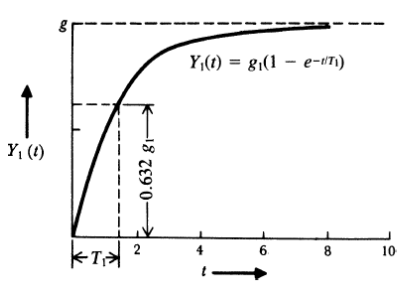

In [ ]:
!pip install -U control qtpy;

In [ ]:
import matplotlib.pyplot as plt

### Instala estilos para imprimir en Matplotlib

In [ ]:
# # sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
# !apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

In [ ]:
!pip install SciencePlots # !pip install git+https://github.com/garrettj403/SciencePlots

In [ ]:
import scienceplots
# plt.style.available #tienen que aparecer science y ieee

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
# import math
import control as ctrl
from control.matlab import * #permite escribir igual que en Matlab
import cmath as cm

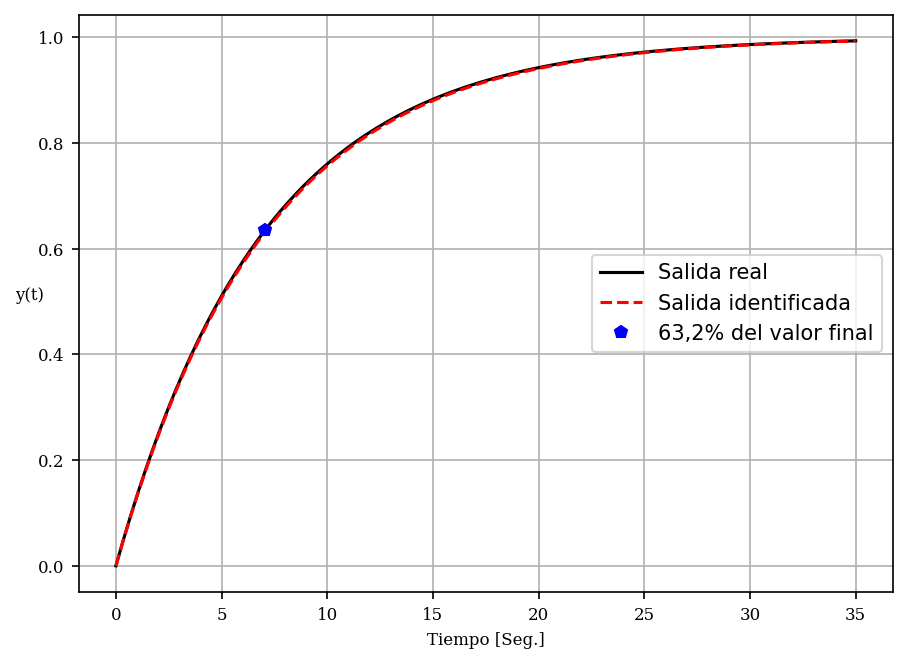

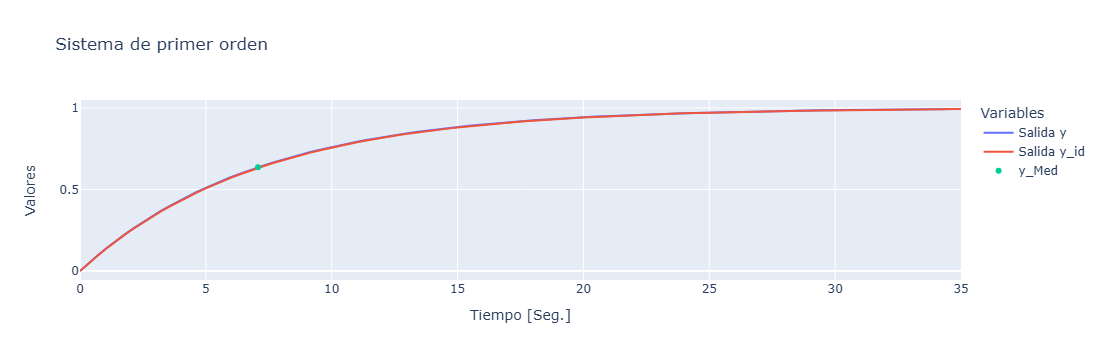

In [ ]:
T1=7
num=[1]
den=[T1, 1]   # T1=0.5
G=tf(num,den) # G=tf(1,[T1 1])
y1, t1 = step(G) #o agregar t para definir el tiempo de evolución
t = np.linspace(0, 35, 100 )
# Gr=tf('s') Acá se usa Padé
# tao=.8; %Retardo de .8seg
tao = .8
n_pade = 20 #Hasta de orden 20 anda bien.
num_pade, den_pade = pade(tao, n_pade)
G_pade = tf(num_pade, den_pade)
y1, t1 = step(G,t) #o agregar t para definir el tiempo de evolución
# y2, t2 = step(G*G_pade,t) #o agregar t para definir el tiempo de evolución
pos=np.argmin(np.abs(y1-0.632)) #Asumiendo que los valores de y1 correspondan a ganancia unitaria
T1_C=t1[pos]
y1_C=y1[pos]
G_C=tf(num,[T1_C, 1])
yc, tc = step(G_C,t) #o agregar t para definir el tiempo de evolución

# with plt.style.context('science'):
with plt.style.context('ieee'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig1o, axs1o = plt.subplots(1,1,figsize=(7,5), dpi= 150) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
# plt.figure()
axs1o.plot(t1, y1)
axs1o.plot(tc, yc)
axs1o.plot(T1_C, y1_C,'pb') # plot(t2,ymin,'sk');
axs1o.legend(['Salida real','Salida identificada','63,2% del valor final'], loc='center right')
axs1o.grid( True )
axs1o.set_ylabel('y(t)',rotation=0)
axs1o.set_xlabel('Tiempo [Seg.]')
plt.show()
df= pd.DataFrame({'t': t1, 'y': y1})
df_id= pd.DataFrame({'t': tc, 'y': yc})
df2 = pd.DataFrame({'tp': [T1_C],'yp': [y1[pos]]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Customize the layout
fig.update_layout(title='Sistema de primer orden',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()
df_1o= pd.DataFrame({'t': t1, 'y': y1, 't_id':tc,'y_id':yc})
df_1o_M= pd.DataFrame({'t_Med':[T1_C],'y_Med':[y1[pos]]})

# Sistemas de segundo orden de polos complejos conjugados
Identificación de los parámetros a partir de la respuesta al escalón, función Heaviside.
Sea la función prototipo

$G=\frac{Y(s)}{U(s)}=g_1\frac{\omega_n^2}{s^2 +2\zeta \omega_ns+\omega_n^2}  $

cuando se aplica un escalón de amplitud unitaria $U(s)=\frac{1}{s}$, se tiene que la respuesta temporal será $y(t)$ como

$y(t)=K\left[1- \frac{exp(-\zeta\omega_nt)}{\sqrt{1-\zeta^2}}sen\left(\omega_n\sqrt{1-\zeta^2} \cdot t+cos^{-1}(\zeta)\right) \right]  $

que puede verse en su evolución temporal en la siguiente gráfica.


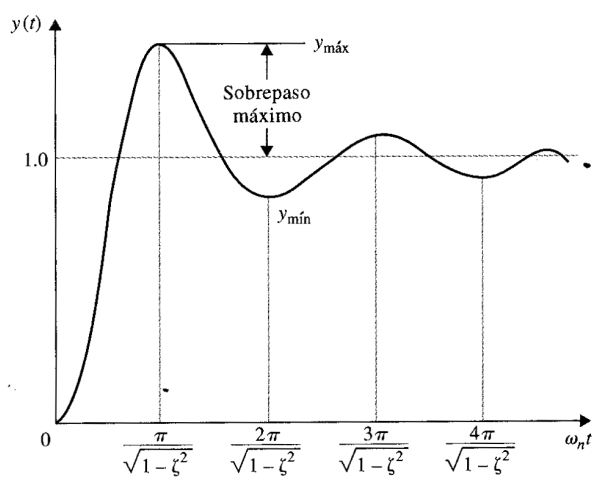

Los polos $\alpha_i$ del sistema están en $-\zeta\omega_n\pm j\omega_d$, siendo $\omega_d=\omega_n \sqrt{1-\zeta^2} $.
La relación de $y_{máx}$ con $\zeta$ es
$\zeta=\frac{ ln(y_{máx}-1)} {\pi\sqrt{1 + \left[\frac{ln(y_{máx}-1)}{\pi} \right]^2 }}.   $

Se tiene entonces, que a partir de los valores de los tiempos correspondientes a $y_{máx}$ y a $y_{mín}$, se tiene que $\omega_d$ resulta
$\omega_d=\frac{ 2\pi } {2\left(t_{y_{min}}- t_{y_{máx}}\right)}.   $

Ahora sí, disponiendo de $\zeta$ y $\omega_d$, se puede hallar $\omega_n$ como

$\omega_n=\frac{ \omega_d} {\sqrt{1-\zeta^2}}.   $


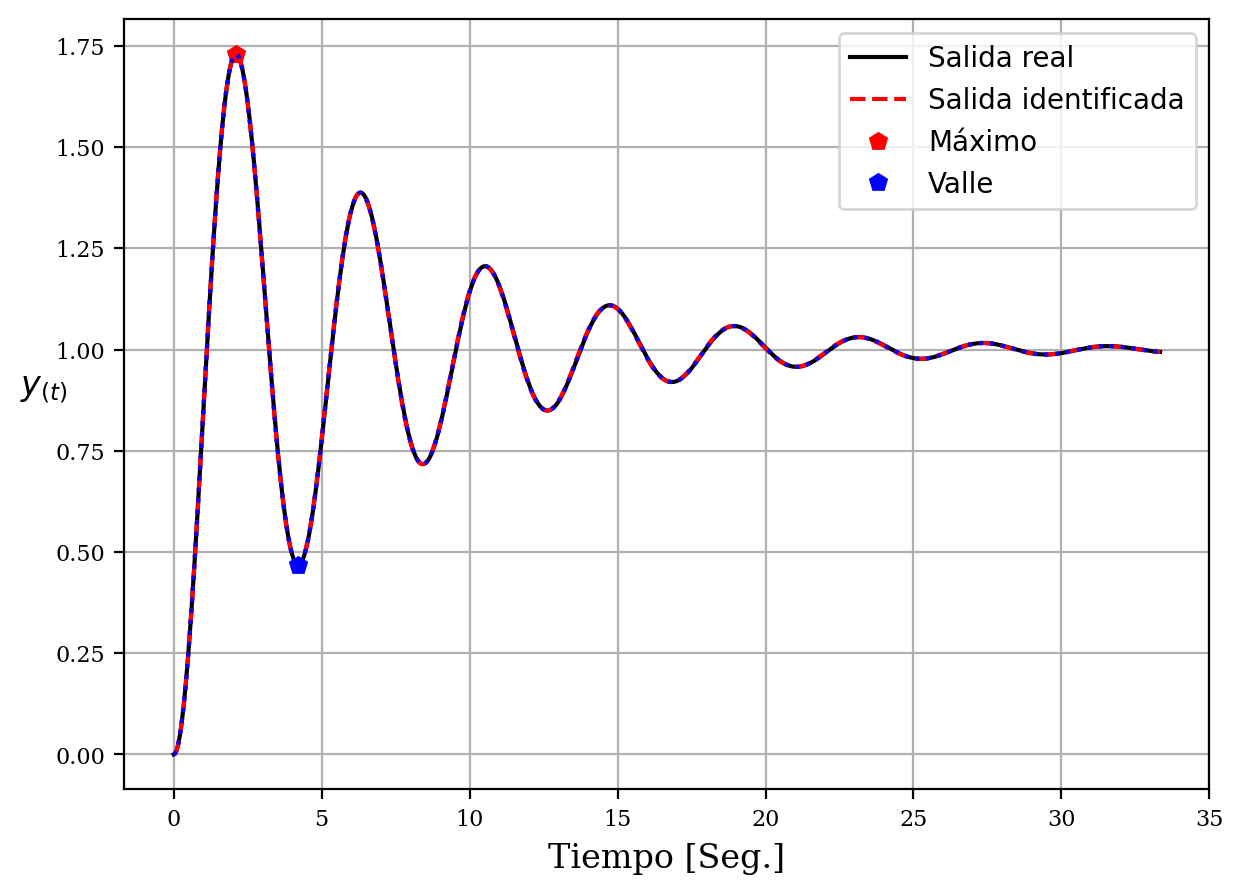

In [ ]:
# wn_r=1.5;
wn_r=1.5
sita_r=.1
Tmax=50. #segundos de simulación
N_Max=1000  #puntos de cálculo
# sita_r=.85;
# TMax=20;
sys_G=tf([wn_r**2],[1, 2*sita_r*wn_r, wn_r**2])
sys_real_=sys_G
y , t0=step(sys_G, np.linspace(0,Tmax/wn_r, N_Max ));
a = np.argmax(y)
ymax=y[a]
t1=t0[a]
b=np.argmin(y[a:-1])
ymin=y[b+a]
t2=t0[b+a]
w_d=(2*np.pi)/(2*(t2-t1))
beta=-np.log(ymax-1)/np.pi
sita_id=beta/(np.sqrt(1+beta**2))
wn_id=w_d/(np.sqrt(1-sita_id**2))
den_id=[1, 2*sita_id*wn_id, wn_id**2];
sys_id = tf([wn_id**2], [1, 2*sita_id*wn_id, wn_id**2])
y_id,t_id= step(sys_id,np.linspace(0,Tmax/wn_r, N_Max ))
# with plt.style.context('science'):
with plt.style.context('ieee'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig2o, axs2o = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
axs2o.plot(t0,y)
axs2o.legend(['y inicial'])
axs2o.plot(t_id,y_id)
axs2o.plot(t1,y[a],'pr')
axs2o.plot(t2,y[a+b-1],'pb') # plot(t2,ymin,'sk');
axs2o.legend(['Salida real','Salida identificada','Máximo','Valle'])
axs2o.plot(t0,y)
axs2o.grid( True )
axs2o.set_ylabel(r'$y_{(t)}$',rotation=0, fontsize=12)
axs2o.set_xlabel('Tiempo [Seg.]', fontsize=12)
plt.show()
# df= pd.DataFrame({'t': t0, 'y': y})
# df_id= pd.DataFrame({'t': t_id, 'y': y_id})
# df2 = pd.DataFrame({'tp': [t1 , t2],'yp': [ymax, ymin]})
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
# fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
# fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# # Customize the layout
# fig.update_layout(title='Sistema de segundo orden',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()
df_2o= pd.DataFrame({'t': t0, 'y': y, 't_id':t_id,'y_id':y_id})
df_2o_M= pd.DataFrame({'t_Med':[t1,t2],'y_Med':[y[a], y[a+b-1]]})

# Extensión a sistemas de dos polos reales y un cero

Real 
    0.45 s + 1
-------------------
7.5 s^2 + 5.5 s + 1

Identificada 
    0.45 s + 1
-------------------
7.5 s^2 + 5.5 s + 1



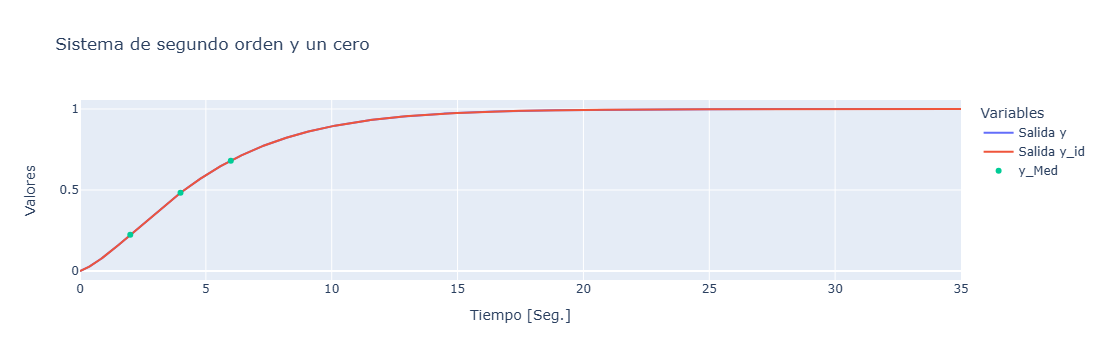

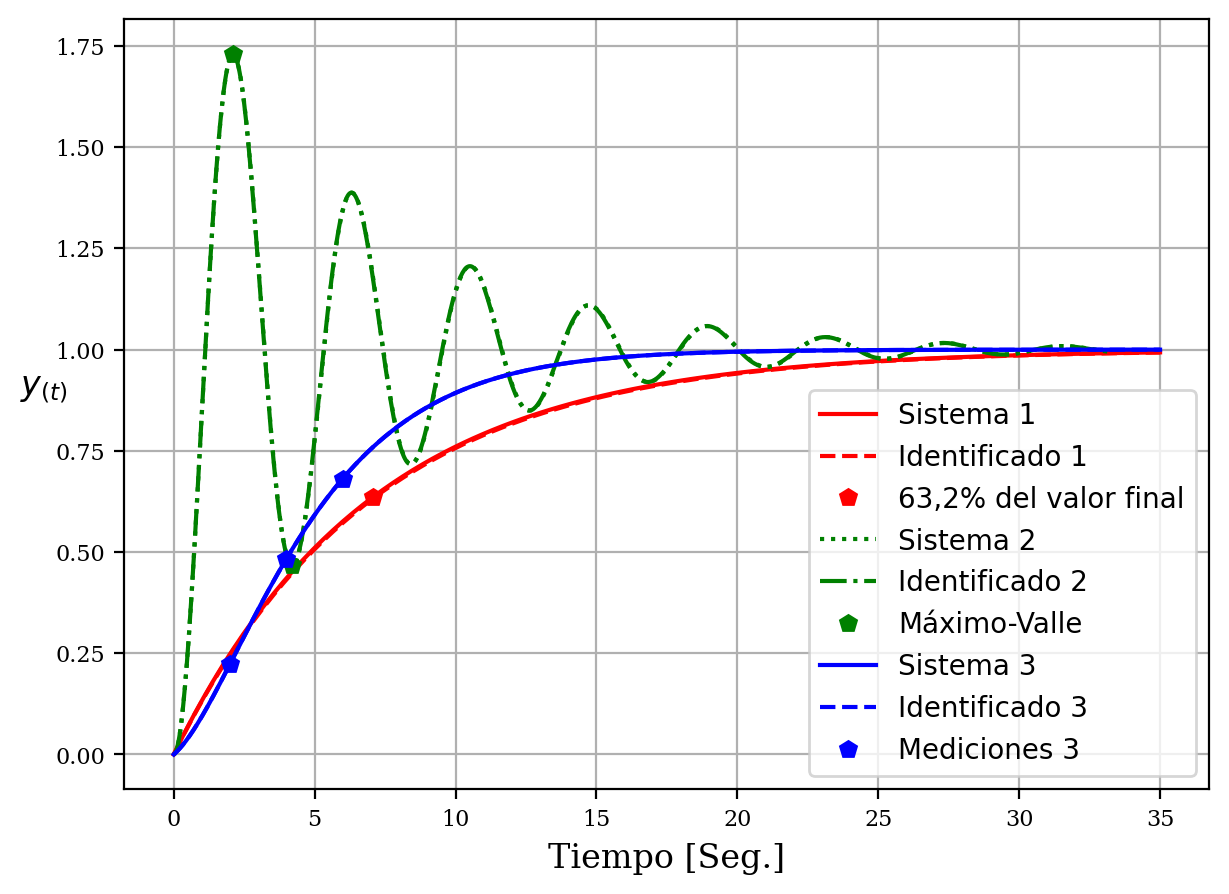

In [ ]:
sys_G=1*tf([.45, 1],np.convolve([2.5, 1],[3, 1])) # sys_G=tf(16*[45 1],conv([25 1],[30 1]))
# sys_G=3*tf([10, 1],np.convolve([6, 1],[6, 1]))  # %sys_G=tf(3*[10 1],conv([6 1],[6 1])); %esta tiene los polos iguales
# sys_G=2*tf([8, 1],[1,2,2]) # % sys_G=tf(2*[8 1],([ 1 2 2])); %la otra planta
StepAmplitude = 1.
N_Max=1000 #Cantidad de muestras
t_s= np.linspace(0,35, N_Max ) # t_s=0:2:50;
y , t0=step(sys_G, t_s) # [y,t0]=step(StepAmplitude*sys_G,t_s);
y_real=y
K=y[-1]/StepAmplitude

y=y/y[-1]
t_inic = 2 #tiempo t1. Con 10 da reales con 20 da complejos.

lugar = np.argmin(np.abs(t_inic-t0)) # [val lugar] =min(abs(t_inic-t0)); y_t1=y(lugar);
y_t1=y[lugar]
lugar_1=lugar
t_t1=t0[lugar] # ii=1;
lugar = np.argmin(np.abs(2*t_inic-t0)) # [val lugar] =min(abs(2*t_inic-t0));
t_2t1=t0[lugar]
y_2t1=y[lugar]
lugar_2=lugar
lugar = np.argmin(np.abs(3*t_inic-t0)) # [val lugar] =min(abs(3*t_inic-t0));
t_3t1=t0[lugar]
y_3t1=y[lugar]
lugar_3=lugar

k1=(1/StepAmplitude)*y_t1/K-1 #%Afecto el valor del Escalon
k2=(1/StepAmplitude)*y_2t1/K-1
k3=(1/StepAmplitude)*y_3t1/K-1
k1=y_t1-1
k2=y_2t1-1
k3=y_3t1-1

be=4*(k1**3)*k3-3*(k1**2)*(k2**2)-4*(k2**3)+(k3**2)+6*k1*k2*k3 # be=4*k1^3*k3 -3*k1^2*k2^2  -4*k2^3+k3^2  +6*k1*k2*k3;
if be > 0: #Cambiar el cálculo para usar números complejos
  alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
else :
  alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
beta=(k1+alfa2)/(alfa1-alfa2)
T1_ang=-t_t1/np.log(alfa1);
T2_ang=-t_t1/np.log(alfa2);
T3_ang=beta*(T1_ang-T2_ang)+T1_ang;
sys_G_ang=K*tf([T3_ang, 1],np.convolve([T1_ang, 1],[T2_ang, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
y_id , t_id = step(StepAmplitude*sys_G_ang, t_s)  # step(StepAmplitude*sys_G,'r',StepAmplitude*sys_G_ang,'k',200),hold on
y=y_real
print('Real', sys_G)
print('Identificada', sys_G_ang)
# plt.plot(t0,y)
df= pd.DataFrame({'t': t0, 'y': y})
df_id= pd.DataFrame({'t': t_id, 'y': y_id})
df2 = pd.DataFrame({'tp': [t_t1 , t_2t1, t_3t1 ],'yp': [y[lugar_1], y[lugar_2],y[lugar_3] ]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Customize the layout
fig.update_layout(title='Sistema de segundo orden y un cero',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()
with plt.style.context('ieee'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig2o, axs2o = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
axs2o.plot(df_1o['t'],df_1o['y'], color='r') # df_1o= pd.DataFrame({'t': t1, 'y': y1, 't_id':tc,'y_id':yc})
axs2o.plot(df_1o['t_id'],df_1o['y_id'])  # df_1o_M= pd.DataFrame({'t_Med':[T1_C],'y_Med':[y1[pos]]})
axs2o.plot(df_1o_M['t_Med'],df_1o_M['y_Med'],'pr')
axs2o.plot(df_2o['t'],df_2o['y'], color='g') # df_2o= pd.DataFrame({'t': t0, 'y': y, 't_id':t_id,'y_id':y_id})
axs2o.plot(df_2o['t_id'],df_2o['y_id'])  # df_2o_M= pd.DataFrame({'t_Med':[t1,t2],'y_Med':[y[a], y[a+b-1]]})
axs2o.plot(df_2o_M['t_Med'],df_2o_M['y_Med'],'pg')

axs2o.plot(df['t'],df['y'], color='b')
axs2o.plot(df_id['t'],df_id['y'], color='b')
axs2o.plot(df2['tp'], df2['yp'],'pb')

axs2o.grid( True )
axs2o.set_ylabel(r'$y_{(t)}$',rotation=0, fontsize=12)
axs2o.set_xlabel('Tiempo [Seg.]', fontsize=12)

axs2o.legend(['Sistema 1','Identificado 1','63,2% del valor final','Sistema 2','Identificado 2','Máximo-Valle','Sistema 3','Identificado 3','Mediciones 3'],loc='lower right')

# ax10.legend(['Salida real','Salida identificada','Mediciones'],loc='center right')

# axs2o.grid( True )
# ax10.set_ylabel(r'$y(t)$',rotation=0, fontsize=12)
# ax10.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.show()

# Sistemas de dos polos reales y un cero en el origen

Para la identificación de los parámetros a partir de la respuesta al escalón, función Heaviside se tiene un procedimiento similar.
Sea la función prototipo

$G=\frac{Y(s)}{U(s)}=K\frac{s}{(T_1s+1)(T_2s+1)}  $

cuando se aplica un escalón de amplitud unitaria $U(s)=\frac{1}{s}$, se tiene que la respuesta temporal será $y(t)$ como

$y(t)=K\left[\frac{exp(-t/T1)}{T_1-T_2}-\frac{exp(-t/T_2)}{T_1-T_2}  \right]  $

que puede verse en su evolución temporal en la siguiente gráfica.


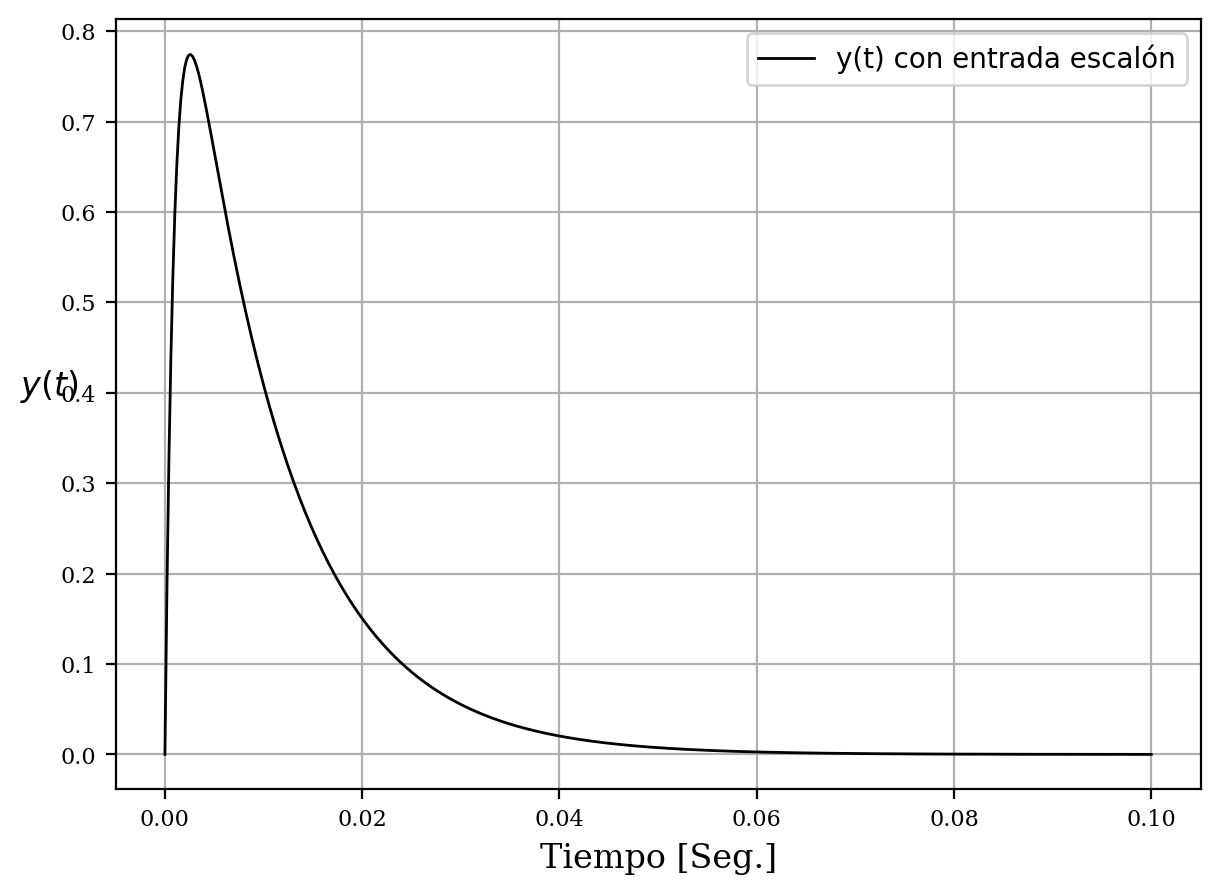

In [ ]:
K = .010
T1 = 1e-2
T2 = 1e-3
tF=10*T1
sys_G=K*tf([1, 0],np.convolve([T1, 1],[T2, 1])) # sys_G=tf(16*[45 1],conv([25 1],[30 1]))
# sys_G=3*tf([10, 1],np.convolve([6, 1],[6, 1]))  # %sys_G=tf(3*[10 1],conv([6 1],[6 1])); %esta tiene los polos iguales
# sys_G=2*tf([8, 1],[1,2,2]) # % sys_G=tf(2*[8 1],([ 1 2 2])); %la otra planta
StepAmplitude = 1. #Escalón
N_Max=500 #Cantidad de muestras
t_s= np.linspace(0,tF, N_Max ) # t_s=0:2:50;
y , t0=step(sys_G,t_s) # [y,t0]=step(StepAmplitude*sys_G,t_s);

# with plt.style.context('science'): #
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig0, ax0 = plt.subplots(1,1,figsize=(7,5), dpi= 200)
# fig0, ax0 = plt.subplots(1,1,figsize=(13,10), dpi= 100) #Comentar luego de instalar los estilos
ax0.plot(t0,y,linewidth =1.0)
ax0.legend([r'y(t) con entrada escalón'])
# ax0[0,0].plot(t, fi, linewidth =1.0)
# ax0[0,0].plot(t, fi_O, linewidth =1.0)
# ax0[0,0].legend(["No lineal","Lineal"])
ax0.grid( True )
ax0.set_ylabel(r'$y(t)$',rotation=0, fontsize=12)
ax0.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.show()
# ax0[0,1].plot(t, omega, linewidth =1.0)
# ax0[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
# ax0[0,1].grid( True )

# with plt.style.context('science'):
# # with plt.style.context('dark_background'):
# # with plt.style.context('seaborn-v0_8-pastel'):
# # with plt.style.context('seaborn-v0_8-poster'):
#     # plt.figure()
#     # plt.plot(x, y)
#     # plt.show()
#   fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
#   fig1, ax1 = plt.subplots(1,1,figsize=(13,10), dpi= 100)
#   fig2, axs2 = plt.subplots(1,2,figsize=(13,10), dpi= 100)

# fig.suptitle('Péndulo')

# plt.plot(t_id,y_id)
# plt.plot(t1,y[a],'pr')
# plt.plot(t2,y[a+b-1],'pb') # plot(t2,ymin,'sk');
# plt.legend(['Salida real','Salida identificada','Máximo','Valle'])
# plt.plot(t0,y)

In [ ]:
!apt install megatools

In [ ]:
!megadl 'https://mega.nz/file/PtgTHa7A#ljOks3CHQhpiVI8hpwlE2lnEGxiR8zKax0SfZL1jcmQ' #Acá está el excel del RLC

Downloaded Curvas_Medidas_RLC_2025.xlsx


In [ ]:
!megadl 'https://mega.nz/file/CtYSzSiB#4cAApwsBxTlLgIeawRDPy1TK_x_gOQK4d2uxgifZMsU'

Downloaded CHEN_1-s2.0-S0895717710005613-main.pdf


In [ ]:
!megadl 'https://mega.nz/file/jhBhkTjK#NBBE13Gb1eSD_S68UHjE6OFz11foQ7QNF304ldGKwtA'

Downloaded Curvas_Medidas_Motor_2025_v.xlsx


In [ ]:
# df = pd.read_csv('Curvas_Medidas_RLC_2025.csv', header=0, decimal=',' ,sep = ';') #recordar convertir a np.array
df = pd.read_excel('Curvas_Medidas_RLC_2025.xlsx', header=(0)) # carga desde Colab

In [ ]:
# !pip install openpyxl

In [ ]:
df.head(3)

,Tiempo [Seg.],Corriente [A],Tensión en el capacitor [V],Tensión de entrada [V],Tensión de salida [V]
0,0.00000,0.0,0.0,0,0.0
1,0.00001,0.0,0.0,0,0.0
2,0.00002,0.0,0.0,0,0.0


In [ ]:
df.columns = ['t', 'i_t', 'VC', 'VE','Vo'] #Renombro las columnas
df.tail(3)

,t,i_t,VC,VE,Vo
19998,0.19998,-1.935961e-14,-12.0,-12,-4.259114e-12
19999,0.19999,-1.935961e-14,-12.0,-12,-4.259114e-12
20000,0.20000,-1.935961e-14,-12.0,-12,-4.259114e-12


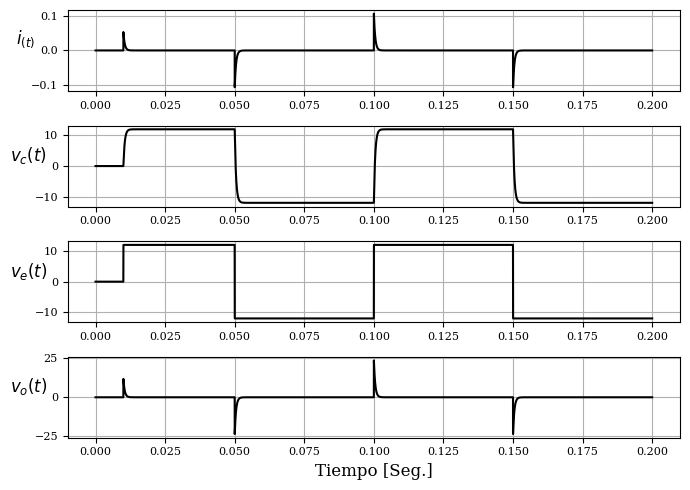

In [ ]:
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig10, ax13 = plt.subplots(4,1,figsize=(7,5), dpi= 100)
ax13[0].plot(df['t'],df['i_t'])
ax13[0].set_ylabel(r'$i_{(t)}$',rotation=0, fontsize=12)
ax13[0].grid( True )
ax13[1].plot(df['t'],df['VC'])
ax13[1].set_ylabel(r'$v_c{(t)}$',rotation=0, fontsize=12)
ax13[1].grid( True )
ax13[2].plot(df['t'],df['VE'])
ax13[2].set_ylabel(r'$v_e{(t)}$',rotation=0, fontsize=12)
ax13[2].grid( True )
ax13[3].plot(df['t'],df['Vo'])
ax13[3].set_ylabel(r'$v_o{(t)}$',rotation=0, fontsize=12)
ax13[3].grid( True )
ax13[3].set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

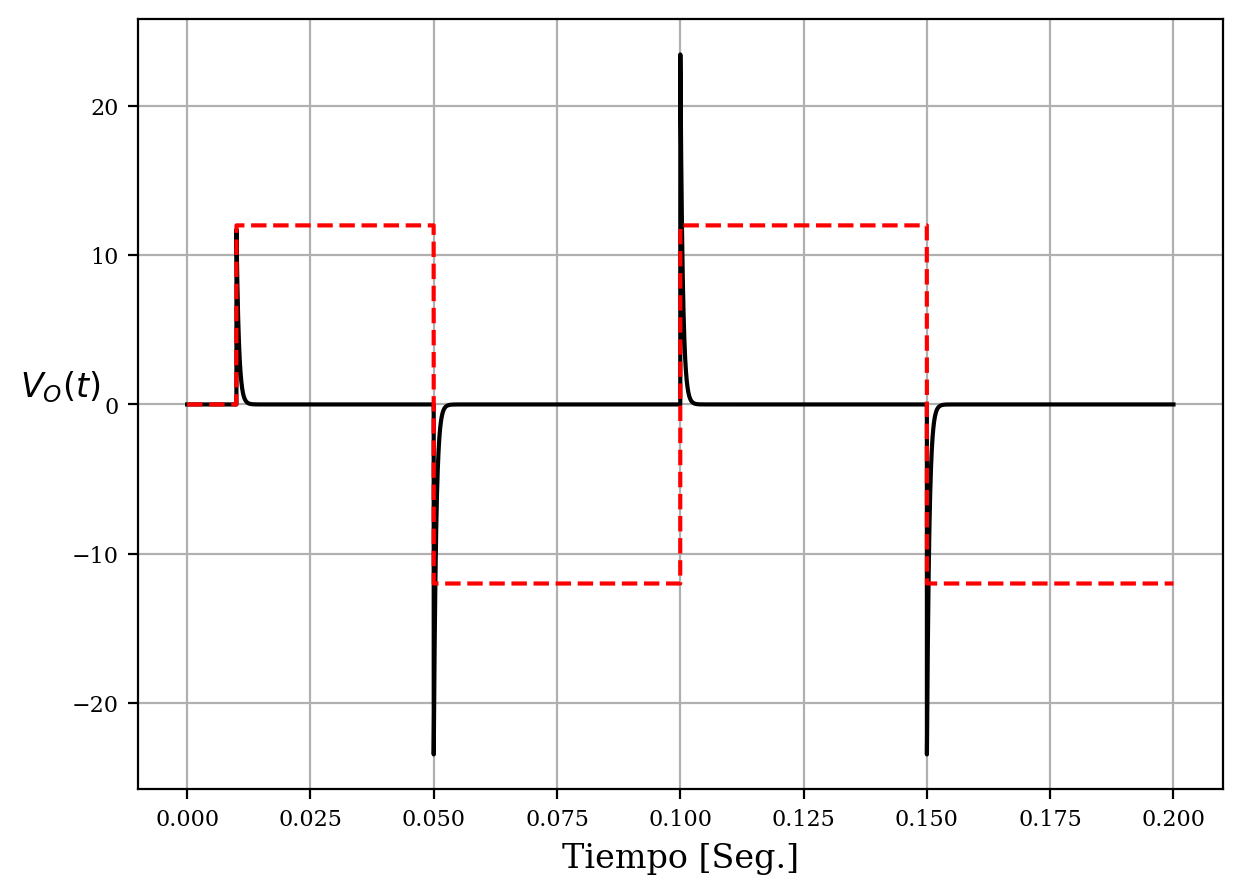

In [ ]:
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig10, ax10 = plt.subplots(1,1,figsize=(7,5), dpi= 200)
ax10.plot(df['t'],df['Vo'])
ax10.plot(df['t'],df['VE'])
ax10.grid( True )
ax10.set_ylabel(r'$V_O(t)$',rotation=0, fontsize=12)
ax10.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.show()

In [ ]:
# i(t)'=R/L i(t) - 1/L v(t)+1/L UnitStep(0)
# v(t)'= 1/C i(t)
from sympy import *
import numpy as np
from sympy.functions.special.delta_functions import Heaviside
R, L, C, K, T1, T2,s=symbols('R L C K T1 T2 s', positive = True, real = True)
init_printing(use_unicode=True)
t=symbols('t')
ii=Function('ii')
v=Function('v')
ODE1=Eq(Derivative(ii(t),t),-(R/L)*ii(t)-(1/L)*v(t)+(1/L)*Heaviside(0))
ODE2=Eq(Derivative(v(t),t),(1/C)*ii(t))
eq=(ODE1,ODE2)
res=dsolve(eq,hint='all',ics={ii(0):0,v(0):0}) #Resultado en res[0] la
ten=simplify(res[1])
corr=simplify(res[0]) #Resultado en corr y ten

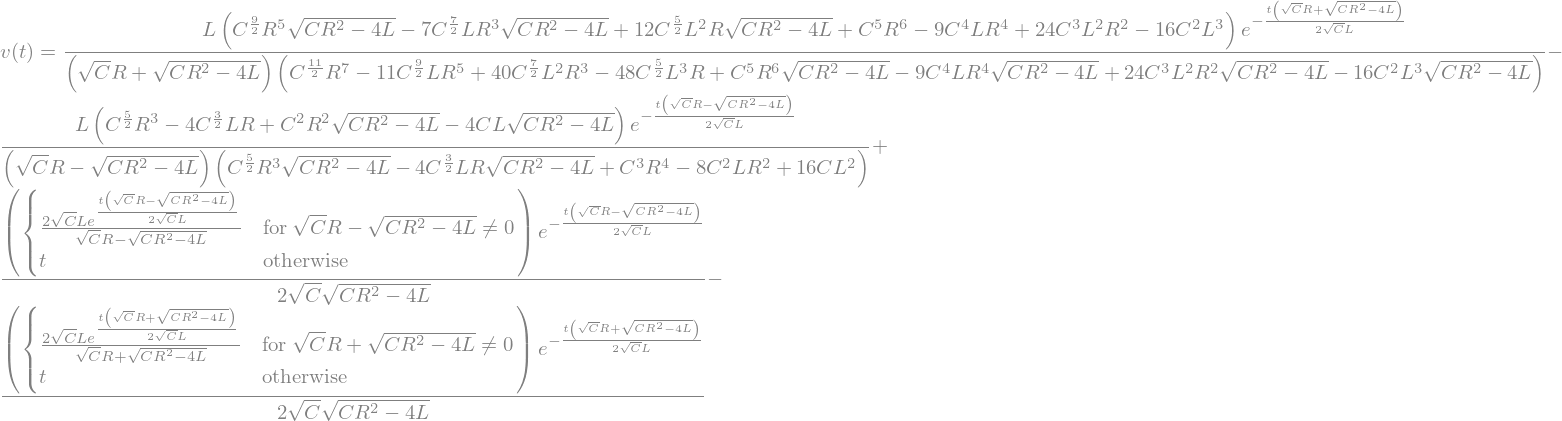

In [ ]:
ten

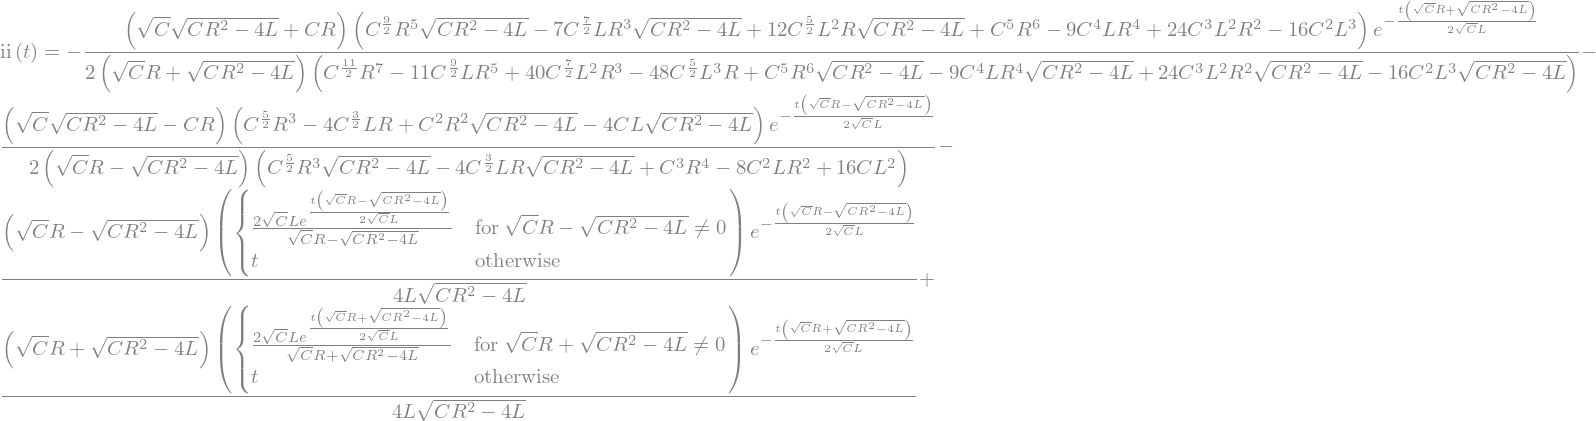

In [ ]:
corr

### Midiendo desde t de $y_{max}$

In [ ]:
t_D = np.array(df['t'])
y_D=np.array(df['i_t'])
# y_D=np.array(df['VO'])
u=np.array(df['VE'])
# % Del Vc
# T1 = 4.3809e-04;
# T2 = 0.0023;
# %
# %  pretty(yt)
# %      /    t \        /    t \
# % K exp| - -- |   K exp| - -- |
# %      \   T1 /        \   T2 /
# % ------------- - -------------
# %    T1 - T2         T1 - T2
ret     =       0.01
# %  solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# % # syms y1 y2 y3 beta alfa1 alfa2;
# % y1, y2, y3, beta, alfa1, alfa2=symbols('y1 y2 y3 beta alfa1 alfa2')
# % ecs=(Eq(y1,beta*(alfa1-alfa2)),Eq(y2,beta*(alfa1**2-alfa2**2)),Eq(y3,beta*(alfa1**3-alfa2**3)))
# % resm=solve(ecs,(alfa1,alfa2,beta))
# % resm
# Y_aux=y_D(30:2500);% plot(y_D(30:2500))
Y_aux=y_D[3:1500]
t_aux=t_D[3:1500]
u_aux=u[3:1500]
y1i=Y_aux.max()
uMAX=u.max()
lugar = np.argmin(np.abs(y1i-Y_aux)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t1i=t_aux[lugar]
y1i=Y_aux.max()/uMAX
lugar = np.argmin(np.abs((t1i-ret)*2+ret-t_D)) # # [val lugar]=min(abs((t1i-ret)*2+ret-t_D));
t2i=t_D[lugar]
y2i=y_D[lugar]/uMAX
lugar = np.argmin(np.abs((t1i-ret)*3+ret-t_D)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t3i=t_D[lugar]
y3i=y_D[lugar]/uMAX
# %syms y1 y2 beta alfa1 y3; solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# alfa1 = (y2i - (- 3*y2i^2 + 4*y1i*y3i)^(1/2))/(2*y1i); %Matlab
# alfa1 = (y2i - 4*y1i*y3i*sqrt(1/(4*y1i*y3i-3*y2i^2))+3*y2i^2*sqrt(1/(4*y1i*y3i-3*y2i^2)))/(2*y1i);%Python
alfa1 = (y2i - 4*y1i*y3i*np.sqrt(1/(4*y1i*y3i-3*y2i**2))+3*(y2i**2)*np.sqrt(1/(4*y1i*y3i-3*(y2i**2))))/(2*y1i) #;%Python
# % (-4*y1*y3*sqrt(1/(4*y1*y3 - 3*y2**2)) + 3*y2**2*sqrt(1/(4*y1*y3 - 3*y2**2)) + y2)/(2*y1)
# % alfa1=(-4*y1i*y3i*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + 3*y2i^2*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + y2i)/(2*y1i)

# %  (y2 +- (- 3*y2^2 + 4*y1*y3)^(1/2))/(2*y1) %es +-, funciona con
# %  cualquiera
alfa2=y2i/y1i-alfa1

T1 =(-(t1i-ret)/np.log(alfa1))
T2 =(-(t1i-ret)/np.log(alfa2))
# % T1 = 4.3809e-04; para comparar con el voltaje en el capacitor
# % T2 = 0.0023; VC
beta=y1i/(alfa1-alfa2)
beta1=y2i/(alfa1**2-alfa2**2)
beta2=y3i/(alfa1**3-alfa2**3) #%Deben ser todos iguales
K=y1i*(T1-T2)/(alfa1-alfa2) #; %y1i ya está divido en 12V
sys_iRLC=K*tf([1, 0], np.convolve([T1, 1],[T2, 1])) #%funcion de transferencia

[y_1,t_1,ent]=lsim(sys_iRLC, u, t_D, [0,0])
C=K

# % R=sys_iRLC.den{1}(2)/C
R=(T1+T2)/C
# % L=sys_iRLC.den{1}(1)/C
L=T1*T2/C
print('R=',R,', L=', L,', C=', C, '.\n\n')
v_param1=np.array([2.2e2,500e-6,2.2e-6])
# h=1e-7;R=2.2e2;L=500e-6;C=2.2e-6;%TP2025

est_param=np.array([R,L,C])
e_rms1=np.sum((est_param-v_param1)@np.transpose(est_param-v_param1))
print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms1, '.\n\n')

# df= pd.DataFrame({'t': t_D, 'y': y_D})
# df_id= pd.DataFrame({'t': t_id, 'y': y_id})
# df2 = pd.DataFrame({'tp': [t_t1 , t_2t1, t_3t1 ],'yp': [y_t1, y_2t1,y_3t1 ]})
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
# fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
# fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# # Customize the layout
# fig.update_layout(title='Sistema de segundo orden y un cero',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()

R= 219.95420464883972 , L= 0.0004889190572619628 , C= 2.2000017043833336e-06 .


R= 219.95420464883972 , L= 0.0004889190572619628 , C= 2.2000017043833336e-06 .
 E_RMS= 0.0020972143106806097 .




c:\Users\julia\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\Users\julia\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\timeresp.py:1089: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


In [ ]:
K,T1,T2

(np.float64(2.2000017043833336e-06),
 np.float64(2.2331276202083837e-06),
 np.float64(0.0004816664974935196))

## Midiendo t desde puntos intermedios a $y_{MAX}$

In [ ]:
t_D = np.array(df['t'])
y_D=np.array(df['i_t'])
u=np.array(df['VE'])
# % Del Vc
# T1 = 4.3809e-04;
# T2 = 0.0023;
# %
# %  pretty(yt)
# %      /    t \        /    t \
# % K exp| - -- |   K exp| - -- |
# %      \   T1 /        \   T2 /
# % ------------- - -------------
# %    T1 - T2         T1 - T2
ret     =       0.01
# %  solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# % # syms y1 y2 y3 beta alfa1 alfa2;
# % y1, y2, y3, beta, alfa1, alfa2=symbols('y1 y2 y3 beta alfa1 alfa2')
# % ecs=(Eq(y1,beta*(alfa1-alfa2)),Eq(y2,beta*(alfa1**2-alfa2**2)),Eq(y3,beta*(alfa1**3-alfa2**3)))
# % resm=solve(ecs,(alfa1,alfa2,beta))
# % resm
# Y_aux=y_D(30:2500);% plot(y_D(30:2500))
Y_aux=y_D[0:1500]
t_aux=t_D[0:1500]
u_aux=u[0:1500]
y1i=Y_aux.max()
uMAX=u.max()
lugar = np.argmin(np.abs(y1i-Y_aux)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t1i=t_aux[lugar]
# Acá cambio por cualquier tiempo intermedio del Máx
t1i=t_aux[lugar]
lugar = np.argmin(np.abs((t1i-ret)+ret-t_D)) # # [val lugar]=min(abs((t1i-ret)*2+ret-t_D));
y1i=y_D[lugar]/uMAX
# y1i=Y_aux.max()/uMAX
lugar = np.argmin(np.abs((t1i-ret)*2+ret-t_D)) # # [val lugar]=min(abs((t1i-ret)*2+ret-t_D));
t2i=t_D[lugar]
y2i=y_D[lugar]/uMAX
lugar = np.argmin(np.abs((t1i-ret)*3+ret-t_D)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t3i=t_D[lugar]
y3i=y_D[lugar]/uMAX
# %syms y1 y2 beta alfa1 y3; solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# alfa1 = (y2i - (- 3*y2i^2 + 4*y1i*y3i)^(1/2))/(2*y1i); %Matlab
# alfa1 = (y2i - 4*y1i*y3i*sqrt(1/(4*y1i*y3i-3*y2i^2))+3*y2i^2*sqrt(1/(4*y1i*y3i-3*y2i^2)))/(2*y1i);%Python
alfa1 = (y2i - 4*y1i*y3i*np.sqrt(1/(4*y1i*y3i-3*y2i**2))+3*(y2i**2)*np.sqrt(1/(4*y1i*y3i-3*(y2i**2))))/(2*y1i) #;%Python
# % (-4*y1*y3*sqrt(1/(4*y1*y3 - 3*y2**2)) + 3*y2**2*sqrt(1/(4*y1*y3 - 3*y2**2)) + y2)/(2*y1)
# % alfa1=(-4*y1i*y3i*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + 3*y2i^2*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + y2i)/(2*y1i)
# %  (y2 +- (- 3*y2^2 + 4*y1*y3)^(1/2))/(2*y1) %es +-, funciona con
# %  cualquiera
alfa2=y2i/y1i-alfa1

T1 =(-(t1i-ret)/np.log(alfa1))
T2 =(-(t1i-ret)/np.log(alfa2))
# % T1 = 4.3809e-04; para comparar con el voltaje en el capacitor
# % T2 = 0.0023; VC
beta=y1i/(alfa1-alfa2)
beta1=y2i/(alfa1**2-alfa2**2)
beta2=y3i/(alfa1**3-alfa2**3) #%Deben ser todos iguales
K=y1i*(T1-T2)/(alfa1-alfa2) #; %y1i ya está divido en 12V
sys_iRLC=K*tf([1, 0], np.convolve([T1, 1],[T2, 1])) #%funcion de transferencia

[y_1,t_1,ent]=lsim(sys_iRLC, u, t_D, [0,0])
C=K
# % R=sys_iRLC.den{1}(2)/C
R=(T1+T2)/C
# % L=sys_iRLC.den{1}(1)/C
L=T1*T2/C
# e_rms=np.sum((y_1-y_D)@np.transpose(y_1-y_D))
v_param=np.array([2.2e2,500e-6,2.2e-6]) #

est_param=np.array([R,L,C])
e_rms=np.sum((est_param-v_param)@np.transpose(est_param-v_param))
print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms, '.\n\n')

df_p= pd.DataFrame({'t': t_D, 'y': y_D})
df_id= pd.DataFrame({'t': t_1, 'y': y_1})
df2 = pd.DataFrame({'tp': [t1i , t2i, t3i ],'yp': [y1i*12, y2i*12,y3i*12 ]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_p['t'], y=df_p['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Customize the layout
fig.update_layout(title='Sistema de segundo orden y un cero',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

R= 219.95420464883972 , L= 0.0004889190572619628 , C= 2.2000017043833336e-06 .
 E_RMS= 0.0020972143106806097 .




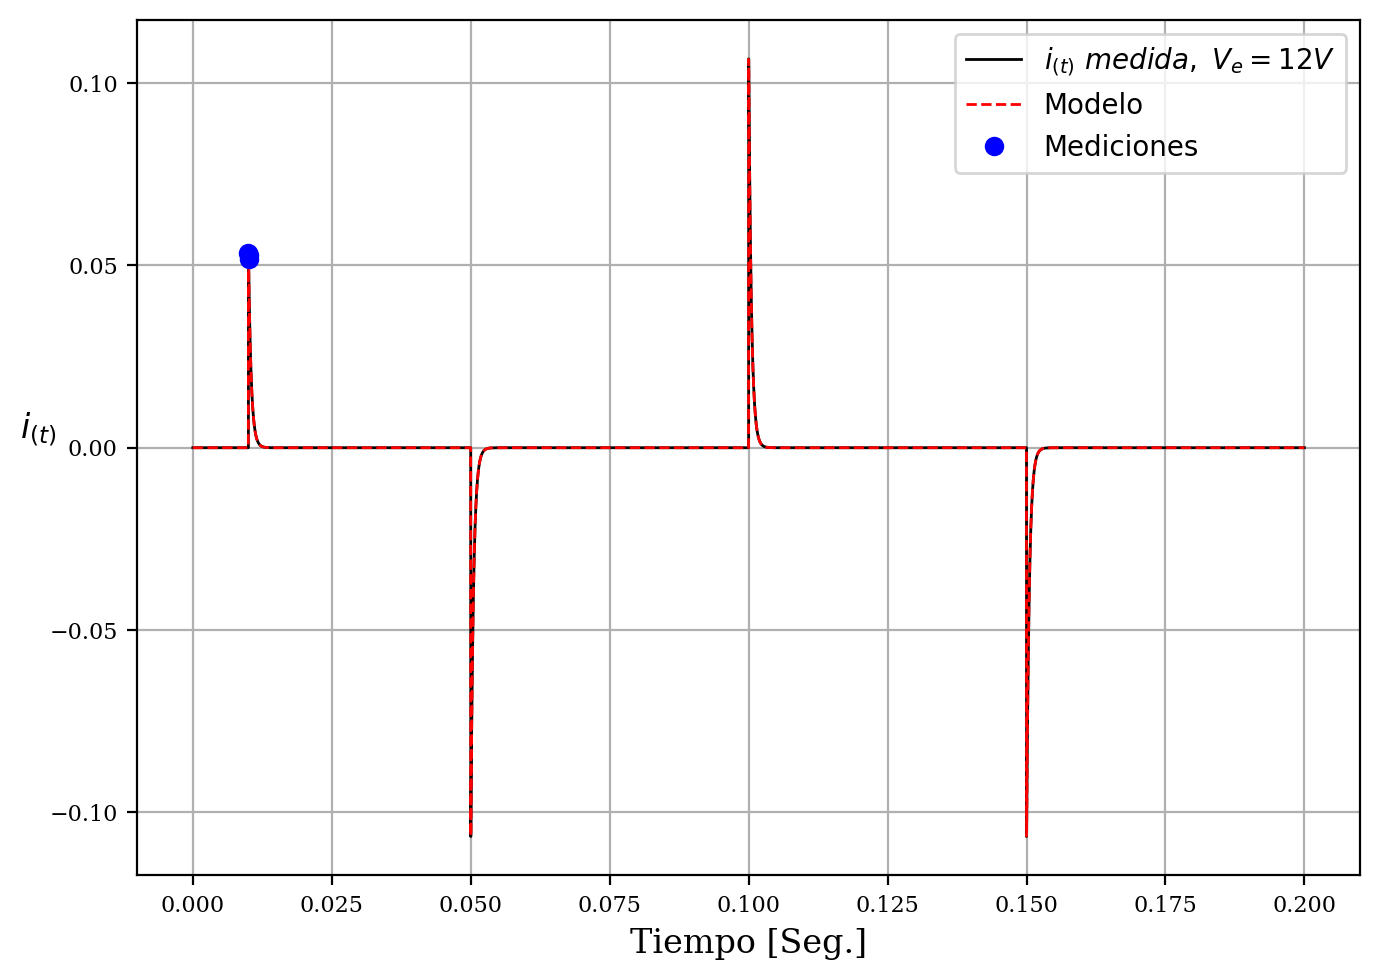

In [ ]:
with plt.style.context('ieee'): #
  fig0, ax0 = plt.subplots(1,1,figsize=(7,5), dpi= 200) #Comentar luego de instalar los estilos
# fig0, ax0 = plt.subplots(1,1,figsize=(13,10), dpi= 100) #Comentar luego de instalar los estilos
ax0.plot(t_D,y_D,linewidth =1.0, color='black', label='Datos')
ax0.plot(t_1,y_1,linewidth =1.0, color='red', label='Modelo')
ax0.plot([t1i,t2i,t3i],[y1i*12,y2i*12, y3i*12],'o') #,xlabel('Tiempo [Seg.]'), ylabel('Corriente [Amp.]')
ax0.legend([r'$i_{(t)} \  medida,\ V_e=12V$',r'Modelo',r'Mediciones'])
# ax0[0,0].plot(t, fi, linewidth =1.0)
# ax0[0,0].plot(t, fi_O, linewidth =1.0)
# ax0[0,0].legend(["No lineal","Lineal"])
ax0.grid( True )
ax0.set_ylabel(r'$i_{(t)}$',rotation=0, fontsize=12)
ax0.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

### Midiendo t de $y_{max}$ y la mitad de este t

In [ ]:
t_D = np.array(df['t'])
y_D=np.array(df['i_t'])
u= np.array(df['VE'])
# % Del Vc
# T1 = 4.3809e-04;
# T2 = 0.0023;
# %
# %  pretty(yt)
# %      /    t \        /    t \
# % K exp| - -- |   K exp| - -- |
# %      \   T1 /        \   T2 /
# % ------------- - -------------
# %    T1 - T2         T1 - T2
ret     =       0.010
# %  solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# % # syms y1 y2 y3 beta alfa1 alfa2;
# % y1, y2, y3, beta, alfa1, alfa2=symbols('y1 y2 y3 beta alfa1 alfa2')
# % ecs=(Eq(y1,beta*(alfa1-alfa2)),Eq(y2,beta*(alfa1**2-alfa2**2)),Eq(y3,beta*(alfa1**3-alfa2**3)))
# % resm=solve(ecs,(alfa1,alfa2,beta))
# % resm
# Y_aux=y_D(30:2500);% plot(y_D(30:2500))
Y_aux=y_D[0:1500]
t_aux=t_D[0:1500]
u_aux=u[0:1500]
# Y_aux=y_D[0:1500]
# t_aux=t_D[0:1500]
y1i=Y_aux.max()
lugar = np.argmin(np.abs(y1i-Y_aux)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t1i=t_aux[lugar]
y1i=Y_aux.max()/12
lugar = np.argmin(np.abs((t1i-ret)*2+ret-t_D)) # # [val lugar]=min(abs((t1i-ret)*2+ret-t_D));
t2i=t_D[lugar]
y2i=y_D[lugar]/12
lugar = np.argmin(np.abs((t1i-ret)/2+ret-t_D)) # %Tomo la mitad en lugar de 3t, t/2 # [val lugar]=min(abs((t1i-ret)/2+ret-t_D));
t3i=t_D[lugar+1] #Ojo, acá se sumó 1 porque daba cero.
y3i=y_D[lugar+1]/12

# plot(t_D, y_D/12);hold;
# plot(t1i,y1i,'o',t2i,y2i,'o',t3i,y3i,'o')
# %syms y1 y2 beta alfa1 y3; solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# alfa1 = (y2i - (- 3*y2i^2 + 4*y1i*y3i)^(1/2))/(2*y1i);
# %  (y2 +- (- 3*y2^2 + 4*y1*y3)^(1/2))/(2*y1) %es +-, funciona con
# % pretty(simplify(res.alfa1)) con raiz cuadrada en lugar de cubo
# % /          /     3          2 \           \
# % |    2     | - y1  + 2 y2 y3  |        2  |
# % |  y1  sqrt| ---------------- | + y2 y3   |
# % |          \        y1        /           |
# % |  -------------------------------------  |
# % |                        2                |
# % |                 2 y1 y3                 |
# % |                                         |
# % |           /     3          2 \          |
# % |     2     | - y1  + 2 y2 y3  |        2 |
# % |   y1  sqrt| ---------------- | - y2 y3  |
# % |           \        y1        /          |
# % | - ------------------------------------- |
# % |                         2               |
# % \                  2 y1 y3                /
# %  cualquiera
# alfa1 =-(y1i^2*sqrt((-y1i^3+2*y2i*y3i^2)/y1i)-y2i*y3i^2)/(2*y1i*y3i^2);
# % alfa1=-y1/(2*y3**2*sqrt(-y1/(y1**3 - 2*y2*y3**2))) + y2/(2*y1); %Python
# % print(resm[0][0])
# alfa1=-y1i/(2*y3i^2*sqrt(-y1i/(y1i^3 - 2*y2i*y3i^2))) + y2i/(2*y1i); %Python
alfa1=-y1i/(2*(y3i**2)*np.sqrt(-y1i/((y1i**3) - 2*y2i*(y3i**2)))) + y2i/(2*y1i) #; %Python

# %syms y1 y2 beta alfa1 y3; solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# alfa1 = (y2i - (- 3*y2i^2 + 4*y1i*y3i)^(1/2))/(2*y1i); %Matlab
# alfa1 = (y2i - 4*y1i*y3i*sqrt(1/(4*y1i*y3i-3*y2i^2))+3*y2i^2*sqrt(1/(4*y1i*y3i-3*y2i^2)))/(2*y1i);%Python
# alfa1 = (y2i - 4*y1i*y3i*np.sqrt(1/(4*y1i*y3i-3*y2i**2))+3*(y2i**2)*np.sqrt(1/(4*y1i*y3i-3*(y2i**2))))/(2*y1i) #;%Python
# % (-4*y1*y3*sqrt(1/(4*y1*y3 - 3*y2**2)) + 3*y2**2*sqrt(1/(4*y1*y3 - 3*y2**2)) + y2)/(2*y1)
# % alfa1=(-4*y1i*y3i*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + 3*y2i^2*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + y2i)/(2*y1i)

# %  (y2 +- (- 3*y2^2 + 4*y1*y3)^(1/2))/(2*y1) %es +-, funciona con
# %  cualquiera
alfa2=y2i/y1i-alfa1

T1 =(-(t1i-ret)/np.log(alfa1))
T2 =(-(t1i-ret)/np.log(alfa2))
# % T1 = 4.3809e-04; para comparar con el voltaje en el capacitor
# % T2 = 0.0023; VC
beta=y1i/(alfa1-alfa2)
beta1=y2i/(alfa1**2-alfa2**2)
beta2=y3i/(np.sqrt(alfa1)-np.sqrt(alfa2)) #%Deben ser todos iguales
K=y1i*(T1-T2)/(alfa1-alfa2) #; %y1i ya está divido en 12V
sys_iRLC=K*tf([1, 0], np.convolve([T1, 1],[T2, 1])) #%funcion de transferencia
[y_1,t_1,ent]=lsim(sys_iRLC, u, t_D, X0=[[0],[0]])
C=K
# % R=sys_iRLC.den{1}(2)/C
R=(T1+T2)/C
# % L=sys_iRLC.den{1}(1)/C
L=T1*T2/C
print('R=',R,', L=', L,', C=', C, '.\n\n')
#h=1e-5;R=2.7e2;L=100e-3;C=10e-6;%TP2024
v_param=np.array([2.7e2,100e-3,10e-6])
est_param2=np.array([R,L,C])
e_rms2=np.sum((est_param2-v_param)@np.transpose(est_param2-v_param))
print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms2, '.\n\n')

R= 223.41116834100842 , L= 0.00020752957034721582 , C= 4.840306592918167e-06 .


R= 223.41116834100842 , L= 0.00020752957034721582 , C= 4.840306592918167e-06 .
 E_RMS= 2170.5291938870373 .




In [ ]:
beta,beta1,beta2

(np.float64(-0.004483761774799219),
 np.float64(-0.00448376177479922),
 np.float64(-0.004483761774799237))

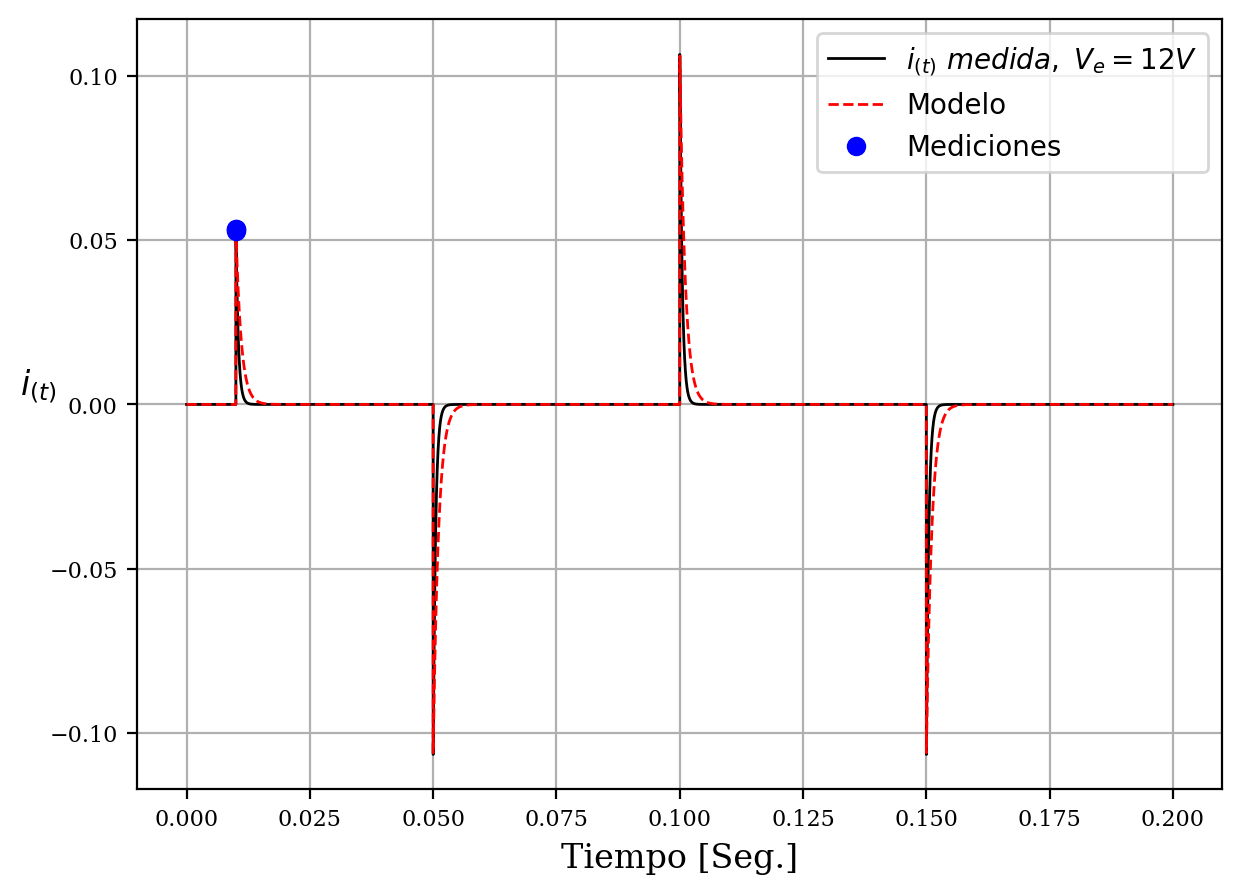

In [ ]:
with plt.style.context('ieee'): #
  fig0, ax0 = plt.subplots(1,1,figsize=(7,5), dpi= 200) #Comentar luego de instalar los estilos
# fig0, ax0 = plt.subplots(1,1,figsize=(13,10), dpi= 100) #Comentar luego de instalar los estilos
ax0.plot(t_D,y_D,linewidth =1.0, color='black', label='Datos')
ax0.plot(t_1,y_1,linewidth =1.0, color='red', label='Modelo')
ax0.plot([t1i,t2i,t3i],[y1i*12,y2i*12, y3i*12],'o') #,xlabel('Tiempo [Seg.]'), ylabel('Corriente [Amp.]')
ax0.legend([r'$i_{(t)} \  medida,\ V_e=12V$',r'Modelo',r'Mediciones'])
# ax0[0,0].plot(t, fi, linewidth =1.0)
# ax0[0,0].plot(t, fi_O, linewidth =1.0)
# ax0[0,0].legend(["No lineal","Lineal"])
ax0.grid( True )
ax0.set_ylabel(r'$i_{(t)}$',rotation=0, fontsize=12)
ax0.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.show()

### Empleando Chen en $V_C$ y luego deduciendo $i_t$

In [ ]:
df.tail(3)

,t,i_t,VC,VE,Vo
19998,0.19998,-1.935961e-14,-12.0,-12,-4.259114e-12
19999,0.19999,-1.935961e-14,-12.0,-12,-4.259114e-12
20000,0.20000,-1.935961e-14,-12.0,-12,-4.259114e-12


In [ ]:
y=np.array(df['VC'])
t0=np.array(df['t'])
ue=np.array(df['VE'])
StepAmplitude=12.
t_inic = .0003 #tiempo t1. Con 10 da reales con 20 da complejos.
lugar = np.argmin(np.abs(t_inic+ret-t0)) # [val lugar] =min(abs(t_inic-t0)); y_t1=y(lugar);
y_t1=y[lugar]
t_t1=t0[lugar]
lugar = np.argmin(np.abs(2*(t_inic)+ret-t0)) # [val lugar] =min(abs(2*t_inic-t0));
t_2t1=t0[lugar]
y_2t1=y[lugar]
lugar = np.argmin(np.abs(3*(t_inic)+ret-t0)) # [val lugar] =min(abs(3*t_inic-t0));
t_3t1=t0[lugar]
y_3t1=y[lugar]
K=y[1400]/StepAmplitude #y[400] tiene el valor de estado estacionario
k1=(1/StepAmplitude)*y_t1/K-1 #%Afecto el valor del Escalon
k2=(1/StepAmplitude)*y_2t1/K-1
k3=(1/StepAmplitude)*y_3t1/K-1
be=4*(k1**3)*k3-3*(k1**2)*(k2**2)-4*(k2**3)+(k3**2)+6*k1*k2*k3 # be=4*k1^3*k3 -3*k1^2*k2^2  -4*k2^3+k3^2  +6*k1*k2*k3;
if be > 0: #Cambiar el cálculo para usar números complejos
  alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
else :
  alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
beta=(k1+alfa2)/(alfa1-alfa2)
T1_ang=-t_inic/np.log(alfa1) # % T1 = 4.3809e-04; para comparar con el voltaje en el capacitor
T2_ang=-t_inic/np.log(alfa2) #% T2 = 0.0023; VC
T3_ang=beta*(T1_ang-T2_ang)+T1_ang
sys_G_ang=K*tf([1],[T1_ang*T2_ang,T1_ang+T2_ang, 1 ]) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
print('Identificada', sys_G_ang)
[y_chen,t_chen,ent]=lsim(sys_G_ang, u, t0, [[0],[0]])
i_t_VC = np.diff(y_chen)/(t_D[100]-t_D[99]) #; %Si C es incognita, se puede dividir el valor de imax del excel con el valor éste
iMAX_Calculado=i_t_VC.max()  #% se busca el máximo de la corriente calculada
iMAX_Medido=max(np.array(df['i_t'])) #% se bsca el max de la i medida en el Excel
C_Chen=iMAX_Medido/iMAX_Calculado
R_Chen=(T1_ang+T2_ang)/C_Chen
L_Chen=T1_ang*T2_ang/C_Chen
print('R_Chen=',R_Chen,', L_Chen=', L_Chen,', C_Chen=', C_Chen, '.\n\n')

#h=1e-5;R=2.7e2;L=100e-3;C=10e-6;%TP2024
v_param=np.array([2.7e2,100e-3,10e-6])
est_paramC=np.array([R_Chen,L_Chen,C_Chen])
e_rmsC=np.sum((est_paramC-v_param)@np.transpose(est_paramC-v_param))
#print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms, '.\n\n')
print('R_Chen=',R_Chen,', L_Chen=', L_Chen,', C_Chen=', C_Chen,'.\n','E_RMS=',e_rmsC, '.\n\n')

Identificada <TransferFunction>: sys[42]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            0.9998
-------------------------------
4.398e-08 s^2 + 0.0005725 s + 1

R_Chen= 181.35245347799133 , L_Chen= 0.013932393403634075 , C_Chen= 3.1568192114073033e-06 .


R_Chen= 181.35245347799133 , L_Chen= 0.013932393403634075 , C_Chen= 3.1568192114073033e-06 .
 E_RMS= 7858.394912004643 .




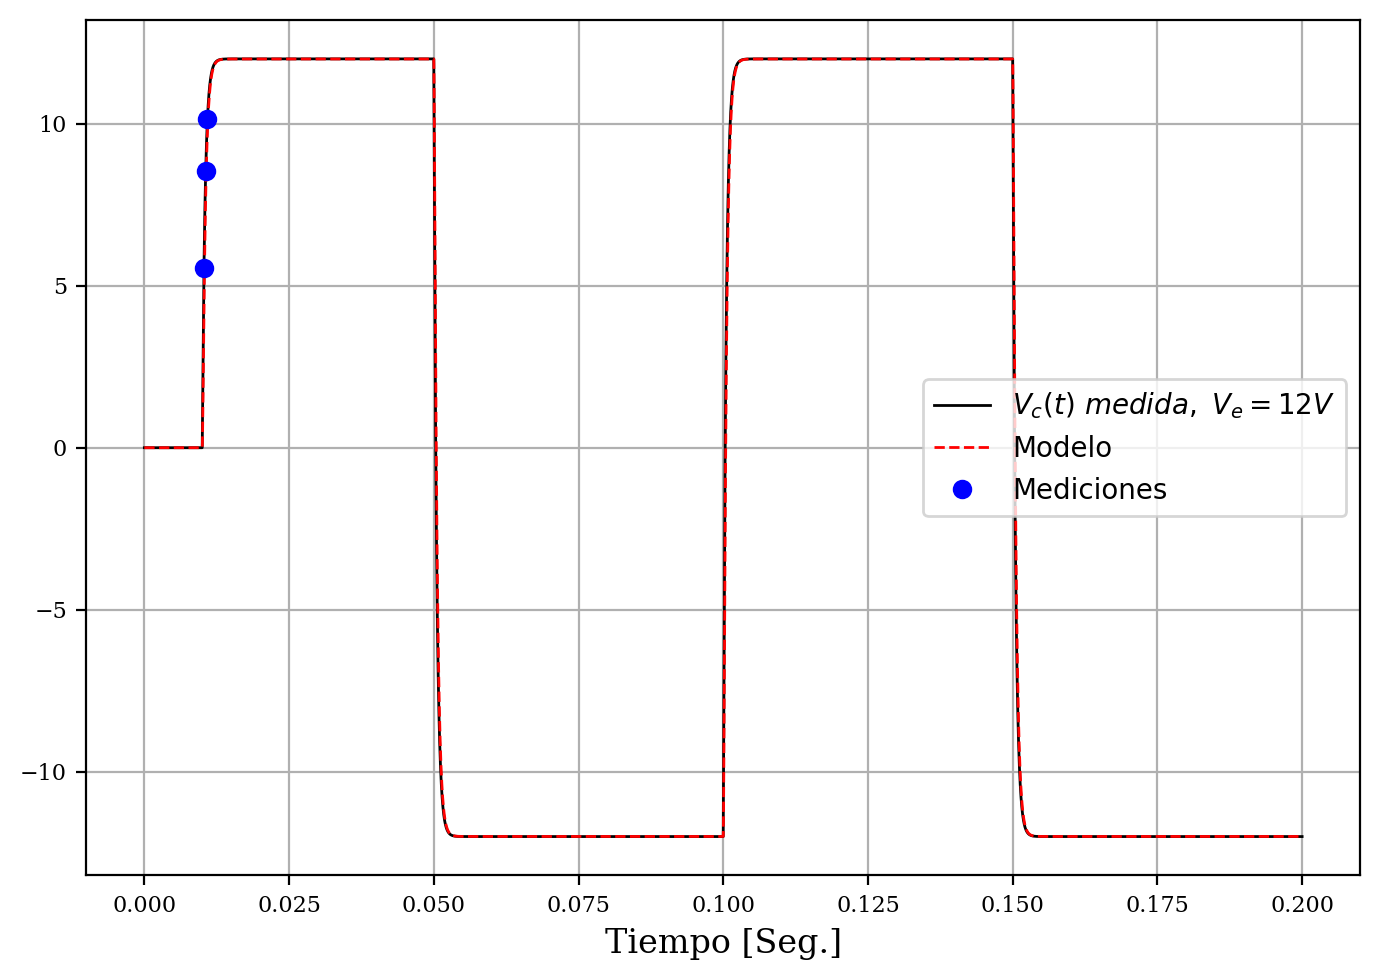

In [ ]:
# with plt.style.context(['ieee','no-latex']): #
with plt.style.context('ieee'): #
  fig01, ax01 = plt.subplots(1,1, figsize=(7,5), dpi= 200) #Comentar luego de instalar los estilos
ax01.plot(t0, y, linewidth =1.0, color='black', label='Datos')
ax01.plot(t_chen, y_chen, linewidth =1.0, color='red', label='Modelo')
ax01.plot([t_t1,t_2t1,t_3t1],[y_t1,y_2t1, y_3t1],'o') #,xlabel('Tiempo [Seg.]'), ylabel('Corriente [Amp.]')
# ax01.legend([r'$V_c_{(t)} \  medida,\ V_e=12V$' , r'Modelo', r'Mediciones'] )
ax01.legend([r'$V_c(t) \  medida,\ V_e=12V$' , r'Modelo', r'Mediciones'] )
# ax0.legend([r'$i_{(t)} \  medida,\ V_e=12V$',r'Modelo',r'Mediciones'])
ax01.grid( True )
# ax01.set_ylabel(r'$V_c_{(t)}$',rotation=0, fontsize=12)
ax01.set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# Recomendaciones finales y conclusiones
Se ha logrado identificar con un error aceptable las funciones de transferencia de primer y segundo orden.


# Cálculo de parámetros del Motor CC 2025

In [ ]:
df_Motor = pd.read_excel('Curvas_Medidas_Motor_2025_v.xls', header=(0)) # carga desde Colab
# https://mega.nz/file/bgpXEBZI#cuYbd_6JKybi3-jN62BfpLY970EzRxkhaFOBuFuwrT0
# df_Motor = pd.read_excel('Curvas_Medidas_Motor_2025_v.xlsx', header=(0)) # carga desde Colab

In [ ]:
# !pip install xlrd

In [ ]:
df_Motor.head(3)

,0.001,0,0.1,0.2,0.3
0,0.002,0.0,0.0,0,0.0
1,0.003,0.0,0.0,0,0.0
2,0.004,0.0,0.0,0,0.0


In [ ]:
df_Motor.columns = ['t', 'wr', 'i_t', 'Vin', 'TL'] #Renombro las columnas
df_Motor.tail(3)


,t,wr,i_t,Vin,TL
1496,1.498,7.618140,0.042110,2,0.0
1497,1.499,7.618339,0.042088,2,0.0
1498,1.500,7.618536,0.042065,2,0.0


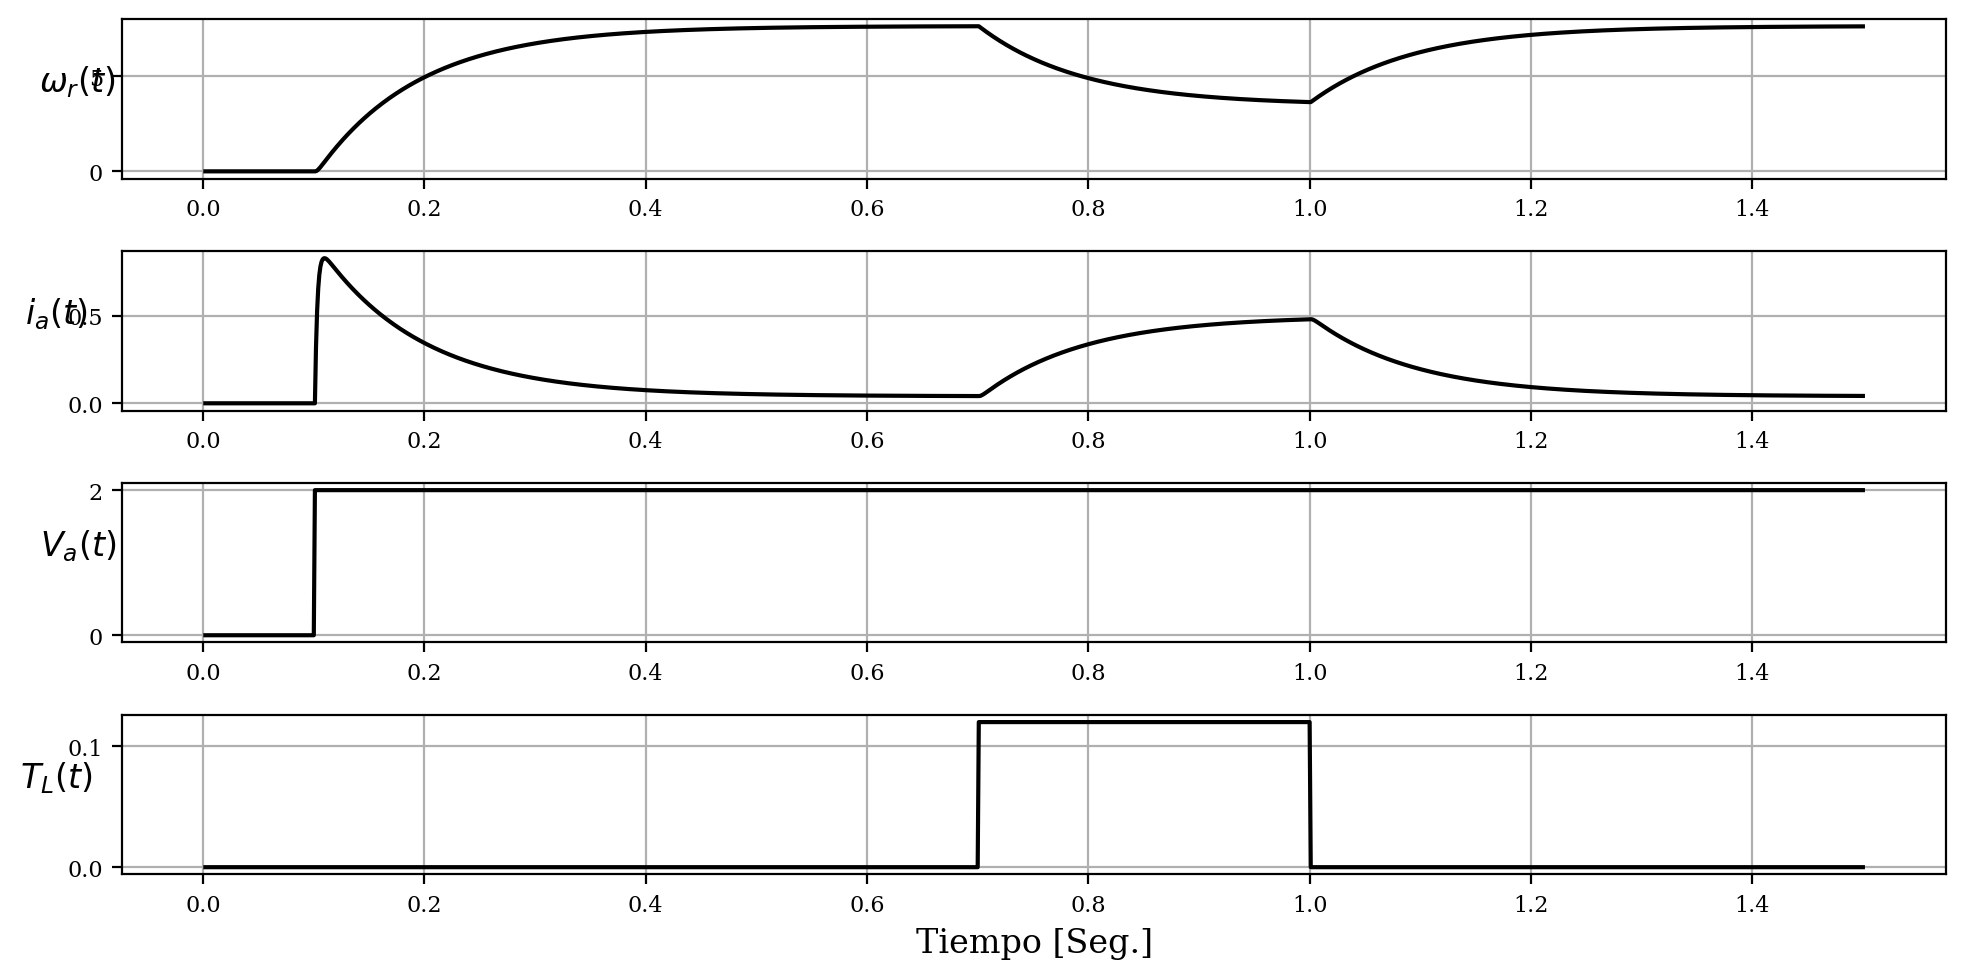

In [ ]:
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig10, ax13 = plt.subplots(4,1,figsize=(10,5), dpi= 200)
ax13[0].plot(df_Motor['t'],df_Motor['wr'])
ax13[0].set_ylabel(r'$\omega_r{(t)}$',rotation=0, fontsize=12)
ax13[0].grid( True )
ax13[1].plot(df_Motor['t'],df_Motor['i_t'])
ax13[1].set_ylabel(r'$i_a{(t)}$',rotation=0, fontsize=12)
ax13[1].grid( True )
ax13[2].plot(df_Motor['t'],df_Motor['Vin'])
ax13[2].set_ylabel(r'$V_a{(t)}$',rotation=0, fontsize=12)
ax13[2].grid( True )
ax13[3].plot(df_Motor['t'],df_Motor['TL'])
ax13[3].set_ylabel(r'$T_L{(t)}$',rotation=0, fontsize=12)
ax13[3].grid( True )
ax13[3].set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df_Motor.tail(3)

,t,wr,i_t,Vin,TL
1496,1.498,7.618140,0.042110,2,0.0
1497,1.499,7.618339,0.042088,2,0.0
1498,1.500,7.618536,0.042065,2,0.0


## Motor CC 2025

### Código de referencia extraído de [acá](https://github.com/Julianpucheta/OptimalControl/blob/main/Ide_Chen_Interactivo.ipynb)

In [ ]:
t_D = np.array(df_Motor['t'], dtype=np.float64)
y_D=np.array(df_Motor['wr'], dtype=np.float64)
u=np.array(df_Motor['Vin'], dtype=np.float64)
TL=np.array(df_Motor['TL'], dtype=np.float64)

# Parámetros iniciales
StepAmplitude = 2  # 2 V de entrada en Va
ret = .103
t = .05

# Buscar puntos para t1, t2, t3
def find_closest(t_target, t_D, y_D):
    idx = np.argmin(np.abs(t_target - t_D))
    return y_D[idx], t_D[idx], idx

y_t, t_val, lugar = find_closest(t + ret, t_D, y_D)
t = t_val - ret  # t1

y_t2, t_val2, lugar = find_closest(2 * t + ret, t_D, y_D)
t2 = t_val2 - ret

y_t3, t_val3, lugar = find_closest(3 * t + ret, t_D, y_D)
t3 = t_val3 - ret

# Ganancia k
k =7.625 / 2.

# Método de Chen
k1 = (1 / StepAmplitude) * y_t / k - 1
k2 = (1 / StepAmplitude) * y_t2 / k - 1
k3 = (1 / StepAmplitude) * y_t3 / k - 1
b = 4 * (k1**3) * k3 - 3 * (k1**2) * (k2**2) - 4 * (k2**3) + (k3**2) + 6 * k1 * k2 * k3
alfa1 = (k1 * k2 + k3 - np.sqrt(b)) / (2 * (k1**2 + k2))
alfa2 = (k1 * k2 + k3 + np.sqrt(b)) / (2 * (k1**2 + k2))
beta = (2 * k1**3 + 3 * k1 * k2 + k3 - np.sqrt(b)) / np.sqrt(b)

T1 = -t / np.log(alfa1)
T2 = -t / np.log(alfa2)
T1 = np.real(T1)
T2 = np.real(T2)
T3 = np.real(beta * (T1 - T2) + T1)

# Sistema de transferencia Va
sys_va=k*tf([1],np.convolve([T1, 1],[T2, 1]))
# Simulación para Va
[y1, t1_, x1] = lsim(sys_va, U=u, T=t_D, X0=[0, 0])

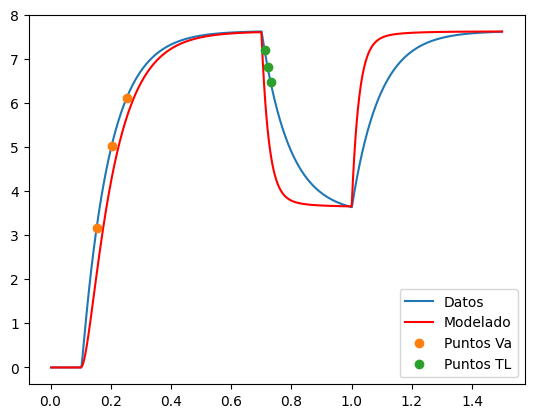

In [ ]:
# Parte para TL. Sólo sirve para sacar la GANANCIA de Estado estacionario
ret_tl = .701
t_tl = .01
y_t_tl, t_val_tl, lugar = find_closest(t_tl + ret_tl, t_D, y_D)
# t_tl = t_val_tl - ret_tl

y_t2_tl, t_val2_tl, lugar = find_closest(2 * t_tl + ret_tl, t_D, y_D)
t2_tl = t_val2_tl - ret_tl

y_t3_tl, t_val3_tl, lugar = find_closest(3 * t_tl + ret_tl, t_D, y_D)
t3_tl = t_val3_tl - ret_tl
# % K=y(00)/U
# w_001=7.635; %Omega en estado estacionario SIN TL
# w_002=3.656; %Omega en estado estacionario CON TL
# k_tl       =       -(w_002-w_001)/TL;
w_001=7.635
w_002=3.6561
TL_ = .12  # Amplitud del escalón de torque
k_tl = -(w_002 - w_001) / TL_

# Corrección de y para TL
yid_1 = -(y_t_tl - w_001)
yid_2 = -(y_t2_tl - w_001)
yid_3 = -(y_t3_tl - w_001)

k1_tl = (1 / TL_) * yid_1 / k_tl - 1
k2_tl = (1 / TL_) * yid_2 / k_tl - 1
k3_tl = (1 / TL_) * yid_3 / k_tl - 1
# b_tl= 4*k1_tl^3*k3_tl-3*k1_tl^2*k2_tl^2-4*k2_tl^3+k3_tl^2+6*k1_tl*k2_tl*k3_tl;
b_tl = 4*(k1_tl**3) * k3_tl - 3 * (k1_tl**2) * (k2_tl**2) - 4 * (k2_tl**3) + k3_tl**2 + 6 * k1_tl * k2_tl * k3_tl

if b_tl > 0: #Cambiar el cálculo para usar números complejos
  # alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  # alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
  alfa1_tl = (k1_tl * k2_tl + k3_tl - np.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
  alfa2_tl = (k1_tl * k2_tl + k3_tl + np.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
else :
  # alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  # alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
  alfa1_tl = (k1_tl * k2_tl + k3_tl - cm.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
  alfa2_tl = (k1_tl * k2_tl + k3_tl + cm.sqrt(b_tl)) / (2 * (k1_tl**2 + k2_tl))
beta_tl = (2 * (k1_tl**3) + 3 * k1_tl * k2_tl + k3_tl - np.sqrt(b_tl)) / np.sqrt(b_tl)
T1_tl = -t_tl / cm.log(alfa1_tl)
T2_tl = -t_tl / cm.log(alfa2_tl)
T1_tl = np.real(T1_tl)
T2_tl = np.real(T2_tl)
T3_tl = np.real(beta_tl * (T1_tl - T2_tl) + T1_tl)
# Sistema de transferencia TL
sys_T=k_tl*tf([T3_tl, 1],np.convolve([T1, 1],[T2, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
# Simulación para TL
[y2, t2_, ent00 ]= lsim(sys_T, U=TL, T=t_D,X0=[0,0])
# Graficar resultados
plt.figure()
plt.plot(t_D, y_D, label='Datos')
plt.plot(t_D, y1 - y2, 'r', label='Modelado')
plt.plot([t + ret, t2 + ret, t3 + ret], [y_t, y_t2, y_t3], 'o', label='Puntos Va')
plt.plot([t_tl + ret_tl, t2_tl + ret_tl, t3_tl + ret_tl], [y_t_tl, y_t2_tl, y_t3_tl], 'o', label='Puntos TL')
plt.legend()
plt.show()

### Conclusiones parciales
Se ha obtenido un modelo erróneo, aunque puede ser útil para alguna aplicación, en general, no se recomienda.

In [ ]:
sys_va

TransferFunction(array([3.8125]), array([0.00217956, 0.11557215, 1.        ]))

In [ ]:
sys_T

TransferFunction(array([ 2.89487766, 33.1575    ]), array([0.00217956, 0.11557215, 1.        ]))

## Con un cero que no esté en el origen, $\omega_r$

## Versión de 2025

In [ ]:
t_D = np.array(df_Motor['t'])
y_D=np.array(df_Motor['wr'])
u=np.array(df_Motor['Vin'])
uMAX=u.max()
t0=t_D
# Y_aux=y_D[30:686]
# t_aux=t_D[30:686]
# u_aux=u[30:686]
ret     =       t_D[100]
y_real=y_D
K1_C=y_D[686]/uMAX
StepAmplitude=uMAX
y=y_D
y_00= y[686]
# y=y/y_00 #normaliza
t_inic = 0.01 #tiempo t1 de Chen. Con 10 da reales con 20 da complejos.

lugar = np.argmin(np.abs(ret+t_inic-t0)) # [val lugar] =min(abs(t_inic-t0)); y_t1=y(lugar);
y_t1=y[lugar]
lugar_1=lugar
t_t1=t0[lugar] # ii=1;
lugar = np.argmin(np.abs(ret+2*t_inic-t0)) # [val lugar] =min(abs(2*t_inic-t0));
t_2t1=t0[lugar]
y_2t1=y[lugar]
lugar_2=lugar
lugar = np.argmin(np.abs(ret+3*t_inic-t0)) # [val lugar] =min(abs(3*t_inic-t0));
t_3t1=t0[lugar]
y_3t1=y[lugar]
lugar_3=lugar

k1=(1/StepAmplitude)*y_t1/K1_C-1 #%Afecto el valor del Escalon
k2=(1/StepAmplitude)*y_2t1/K1_C-1
k3=(1/StepAmplitude)*y_3t1/K1_C-1

be=4*(k1**3)*k3-3*(k1**2)*(k2**2)-4*(k2**3)+(k3**2)+6*k1*k2*k3 # be=4*k1^3*k3 -3*k1^2*k2^2  -4*k2^3+k3^2  +6*k1*k2*k3;
if be > 0: #Cambiar el cálculo para usar números complejos
  alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
else :
  alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
beta=(k1+alfa2)/(alfa1-alfa2)
T1_angw=-t_inic/np.log(alfa1);
T2_angw=-t_inic/np.log(alfa2);
T3_angw=beta*(T1_angw-T2_angw)+T1_angw;
sys_Gw_ang=K1_C*tf([T3_angw, 1],np.convolve([T1_angw, 1],[T2_angw, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
# y_id , t_id = step(StepAmplitude*sys_G_ang, t_D)  # step(StepAmplitude*sys_G,'r',StepAmplitude*sys_G_ang,'k',200),hold on
# y=y_real
[y_idw , t_idw ,ent2]=lsim(sys_Gw_ang, u, t_D, [0,0])
# print('Real', sys_G)
print('Identificada', sys_Gw_ang)

Identificada <TransferFunction>: sys[74]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     0.003142 s + 3.811
-----------------------------
0.0002151 s^2 + 0.09457 s + 1



## Con un cero que no esté en el Origen, $i_a(t)$

In [ ]:
t_D = np.array(df_Motor['t'])
y_D=np.array(df_Motor['i_t'])
u=np.array(df_Motor['Vin'])
uMAX=u.max()
t0=t_D
# Y_aux=y_D[30:686]
# t_aux=t_D[30:686]
# u_aux=u[30:686]
ret     =       t_D[100]
y_real=y_D
K2_C=y_D[686]/uMAX
StepAmplitude=uMAX
y=y_D
y_00= y[686]
# y=y/y_00 #normaliza
t_inic = 0.01 #tiempo t1 de Chen. Con 10 da reales con 20 da complejos.

lugar = np.argmin(np.abs(ret+t_inic-t0)) # [val lugar] =min(abs(t_inic-t0)); y_t1=y(lugar);
y_t1=y[lugar]
lugar_1=lugar
t_t1=t0[lugar] # ii=1;
lugar = np.argmin(np.abs(ret+2*t_inic-t0)) # [val lugar] =min(abs(2*t_inic-t0));
t_2t1=t0[lugar]
y_2t1=y[lugar]
lugar_2=lugar
lugar = np.argmin(np.abs(ret+3*t_inic-t0)) # [val lugar] =min(abs(3*t_inic-t0));
t_3t1=t0[lugar]
y_3t1=y[lugar]
lugar_3=lugar

k1=(1/StepAmplitude)*y_t1/K2_C-1 #%Afecto el valor del Escalon
k2=(1/StepAmplitude)*y_2t1/K2_C-1
k3=(1/StepAmplitude)*y_3t1/K2_C-1

be=4*(k1**3)*k3-3*(k1**2)*(k2**2)-4*(k2**3)+(k3**2)+6*k1*k2*k3 # be=4*k1^3*k3 -3*k1^2*k2^2  -4*k2^3+k3^2  +6*k1*k2*k3;
if be > 0: #Cambiar el cálculo para usar números complejos
  alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
else :
  alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
beta=(k1+alfa2)/(alfa1-alfa2)
T1_ang=-t_inic/np.log(alfa1);
T2_ang=-t_inic/np.log(alfa2);
T3_ang=beta*(T1_ang-T2_ang)+T1_ang;
sys_G_ang=K2_C*tf([T3_ang, 1],np.convolve([T1_angw, 1],[T2_angw, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
# y_id , t_id = step(StepAmplitude*sys_G_ang, t_D)  # step(StepAmplitude*sys_G,'r',StepAmplitude*sys_G_ang,'k',200),hold on
# y=y_real
[y_id , t_id ,ent2]=lsim(sys_G_ang, u, t_D, [0,0])
# print('Real', sys_G)
print('Identificada', sys_G_ang)

Identificada <TransferFunction>: sys[82]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     0.04146 s + 0.02078
-----------------------------
0.0002151 s^2 + 0.09457 s + 1



### Midiendo desde t de $y_{max}$ con un cero en el origen
Da el mismo denominador, pero optimizado en el lugar de máxima dinámica.

In [ ]:
t_D = np.array(df_Motor['t'])
y_D=np.array(df_Motor['i_t'])
# y_D=np.array(df['VO'])
u=np.array(df_Motor['Vin'])
# % Del Vc
# T1 = 4.3809e-04;
# T2 = 0.0023;
# %
# %  pretty(yt)
# %      /    t \        /    t \
# % K exp| - -- |   K exp| - -- |
# %      \   T1 /        \   T2 /
# % ------------- - -------------
# %    T1 - T2         T1 - T2
ret     =       t_D[100]
# %  solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# % # syms y1 y2 y3 beta alfa1 alfa2;
# % y1, y2, y3, beta, alfa1, alfa2=symbols('y1 y2 y3 beta alfa1 alfa2')
# % ecs=(Eq(y1,beta*(alfa1-alfa2)),Eq(y2,beta*(alfa1**2-alfa2**2)),Eq(y3,beta*(alfa1**3-alfa2**3)))
# % resm=solve(ecs,(alfa1,alfa2,beta))
# % resm
# Y_aux=y_D(30:2500);% plot(y_D(30:2500))
Y_aux=y_D[30:686]
t_aux=t_D[30:686]
u_aux=u[30:686]
y1i=Y_aux.max()
uMAX=u.max()
lugar = np.argmin(np.abs(y1i-Y_aux)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t1i=t_aux[lugar]
y1i=Y_aux.max()/uMAX
lugar = np.argmin(np.abs((t1i-ret)*2+ret-t_D)) # # [val lugar]=min(abs((t1i-ret)*2+ret-t_D));
t2i=t_D[lugar]
y2i=y_D[lugar]/uMAX
lugar = np.argmin(np.abs((t1i-ret)*3+ret-t_D)) ## [val lugar]=min(abs((t1i-ret)*3+ret-t_D));
t3i=t_D[lugar]
y3i=y_D[lugar]/uMAX
# %syms y1 y2 beta alfa1 y3; solve(y3/y1==(alfa1^3-(y2/y1-alfa1)^3)/(alfa1-(y2/y1-alfa1)),alfa1)
# alfa1 = (y2i - (- 3*y2i^2 + 4*y1i*y3i)^(1/2))/(2*y1i); %Matlab
# alfa1 = (y2i - 4*y1i*y3i*sqrt(1/(4*y1i*y3i-3*y2i^2))+3*y2i^2*sqrt(1/(4*y1i*y3i-3*y2i^2)))/(2*y1i);%Python
alfa1 = (y2i - 4*y1i*y3i*np.sqrt(1/(4*y1i*y3i-3*y2i**2))+3*(y2i**2)*np.sqrt(1/(4*y1i*y3i-3*(y2i**2))))/(2*y1i) #;%Python
# % (-4*y1*y3*sqrt(1/(4*y1*y3 - 3*y2**2)) + 3*y2**2*sqrt(1/(4*y1*y3 - 3*y2**2)) + y2)/(2*y1)
# % alfa1=(-4*y1i*y3i*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + 3*y2i^2*sqrt(1/(4*y1i*y3i - 3*y2i^2)) + y2i)/(2*y1i)

# %  (y2 +- (- 3*y2^2 + 4*y1*y3)^(1/2))/(2*y1) %es +-, funciona con
# %  cualquiera
alfa2=y2i/y1i-alfa1

T1 =(-(t1i-ret)/np.log(alfa1))
T2 =(-(t1i-ret)/np.log(alfa2))
# % T1 = 4.3809e-04; para comparar con el voltaje en el capacitor
# % T2 = 0.0023; VC
beta=y1i/(alfa1-alfa2)
beta1=y2i/(alfa1**2-alfa2**2)
beta2=y3i/(alfa1**3-alfa2**3) #%Deben ser todos iguales
K=y1i*(T1-T2)/(alfa1-alfa2) #; %y1i ya está divido en 12V
sys_iMotor=K*tf([1, 0], np.convolve([T1, 1],[T2, 1])) #%funcion de transferencia

[y_1,t_1,ent]=lsim(sys_iMotor, u, t_D, [0,0])
# C=K

# # % R=sys_iRLC.den{1}(2)/C
# R=(T1+T2)/C
# # % L=sys_iRLC.den{1}(1)/C
# L=T1*T2/C
# print('R=',R,', L=', L,', C=', C, '.\n\n')
# #h=1e-5;R=2.7e2;L=100e-3;C=10e-6;%TP2024
# v_param1=np.array([2.7e2,100e-3,10e-6])
# est_param=np.array([R,L,C])
# e_rms1=np.sum((est_param-v_param1)@np.transpose(est_param-v_param1))
# print('R=',R,', L=', L,', C=', C, '.\n','E_RMS=',e_rms1, '.\n\n')

# df= pd.DataFrame({'t': t0, 'y': y})
# df_id= pd.DataFrame({'t': t_id, 'y': y_id})
# df2 = pd.DataFrame({'tp': [t_t1 , t_2t1, t_3t1 ],'yp': [y_t1, y_2t1,y_3t1 ]})
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
# fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
# fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# # Customize the layout
# fig.update_layout(title='Sistema de segundo orden y un cero',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()

In [ ]:
print('Identificada i(t)', sys_iMotor)

Identificada i(t) <TransferFunction>: sys[86]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          0.04399 s
-----------------------------
0.0001936 s^2 + 0.09994 s + 1



In [ ]:
Den=sys_iMotor.den/sys_iMotor.num[0][0][0]

In [ ]:
Den_n=Den/Den[0][0][0]
Den_n

array([[[1.00000000e+00, 5.16220563e+02, 5.16544155e+03]]])

Completa y despreciando a Bm.

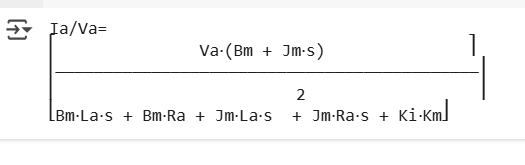

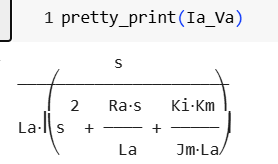

Sabiendo de https://colab.research.google.com/drive/1w2ue65U_jFG9fqHxgaLqPZ5NtRa6i33J?authuser=1#scrollTo=-nNJzDAK9nKS que


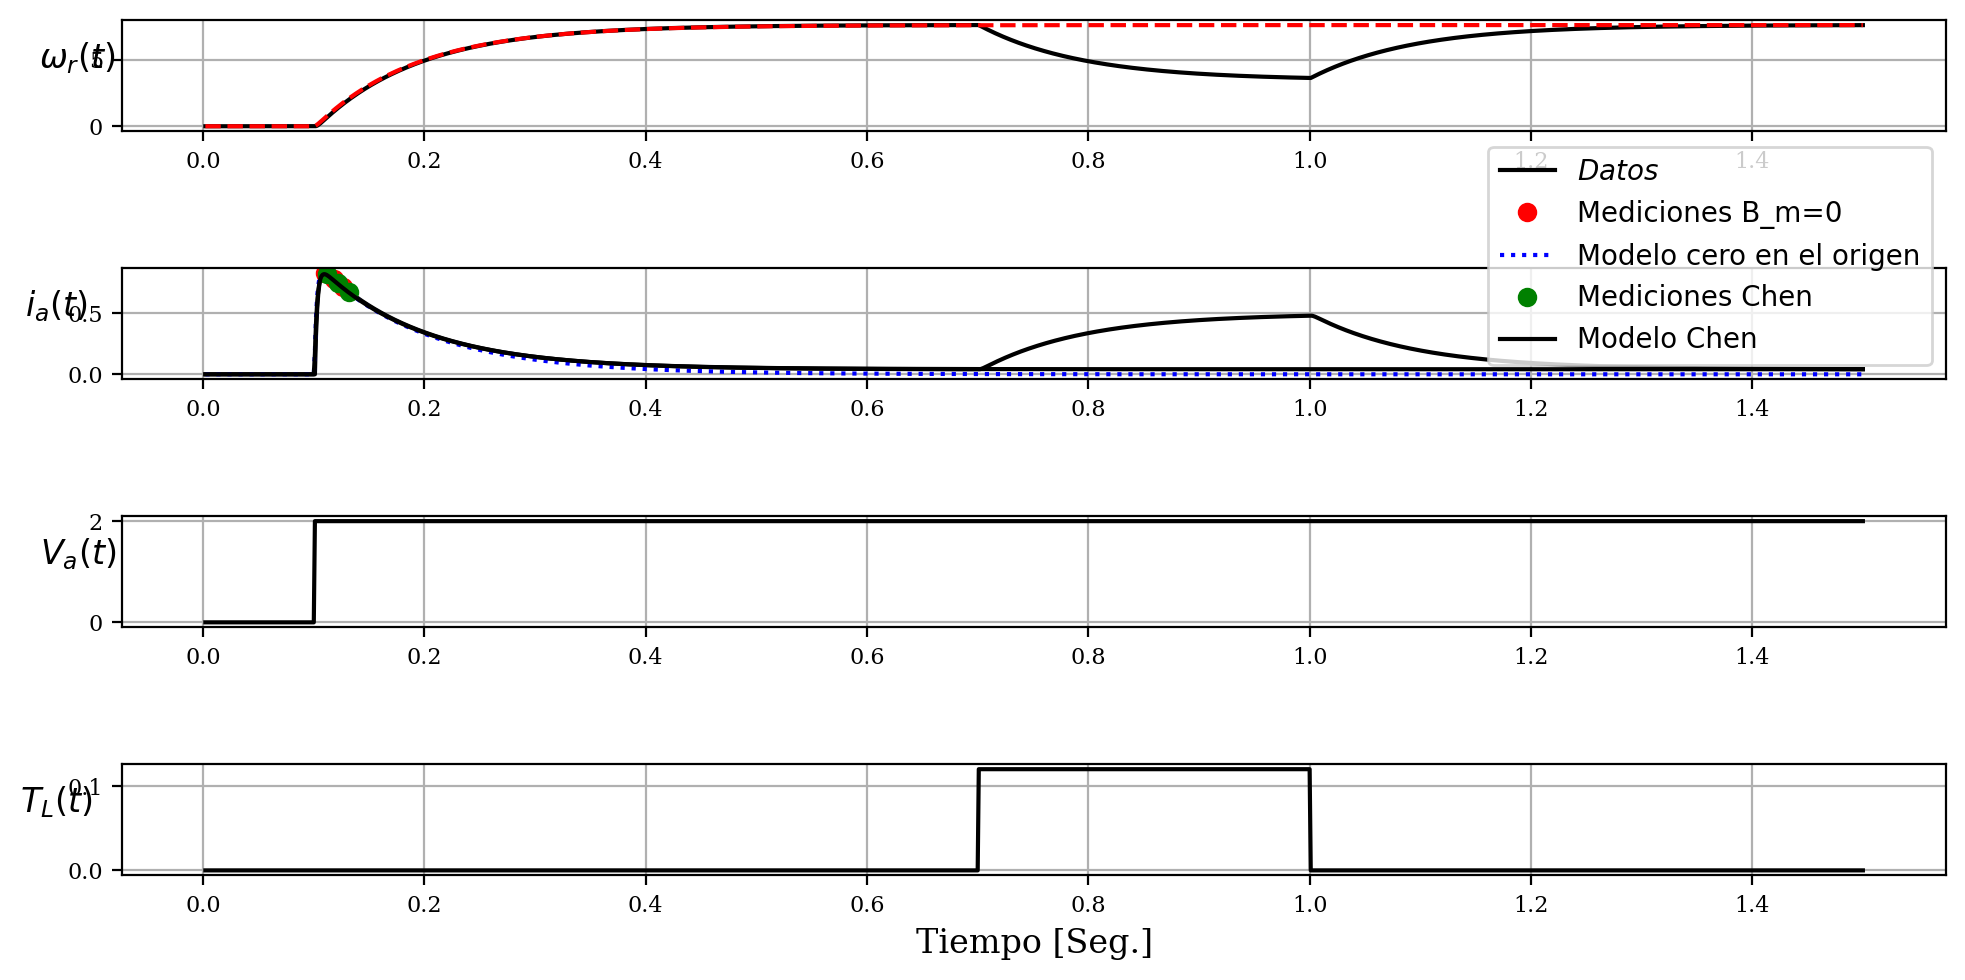

In [ ]:
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig10, ax13 = plt.subplots(4,1,figsize=(10,5), dpi= 200)
ax13[0].plot(df_Motor['t'],df_Motor['wr'])
ax13[0].plot(t_idw,y_idw)
ax13[1].legend([r'$Datos$' , r'Modelo Chen' ] )
ax13[0].set_ylabel(r'$\omega_r{(t)}$',rotation=0, fontsize=12)
ax13[0].grid( True )
ax13[1].plot(df_Motor['t'],df_Motor['i_t'])
ax13[1].plot([t1i,t2i,t3i],[uMAX*y1i,uMAX*y2i,uMAX*y3i],'o')
ax13[1].plot(t_1,y_1)
ax13[1].plot([t_t1, t_2t1, t_3t1], [y_t1,y_2t1,y_3t1],'o')
ax13[1].plot(t_id,y_id)
ax13[1].legend([r'$Datos$' , r'Mediciones B_m=0', r'Modelo cero en el origen',r'Mediciones Chen',r'Modelo Chen'] )
ax13[1].set_ylabel(r'$i_a{(t)}$',rotation=0, fontsize=12)
ax13[1].grid( True )
ax13[2].plot(df_Motor['t'],df_Motor['Vin'])
ax13[2].set_ylabel(r'$V_a{(t)}$',rotation=0, fontsize=12)
ax13[2].grid( True )
ax13[3].plot(df_Motor['t'],df_Motor['TL'])
ax13[3].set_ylabel(r'$T_L{(t)}$',rotation=0, fontsize=12)
ax13[3].grid( True )
ax13[3].set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# sys_Gw_ang=K1_C*tf([T3_angw, 1],np.convolve([T1_angw, 1],[T2_angw, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
# sys_G_ang=K2_C*tf([T3_ang, 1],np.convolve([T1_angw, 1],[T2_angw, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
T3=T3_ang #sale de la corriente respecto de Va
# T3=T3_angw #éste sale de wr respecto del torque, pero debe hallarse a prueba y error.
T1=T1_angw;T2=T2_angw;# comentando Ahora a T1 y T2 lo da el denominador con cero en el origen
# Ra=2.27;La=0.0047;Ki=0.25;Kb=0.25;Bm=0.00131;Jm=0.00233;Km=Kb; Laa=La; J=Jm;B=Bm; %Motor KUO Ec 6-37


In [ ]:
La=T1*T2/(K2_C*T3)
La

np.float64(0.005187184919244553)

In [ ]:
Ra=(-T1*T2 + T1*T3 + T2*T3)/(K2_C*T3**2)
Ra

np.float64(2.2781228953606902)

In [ ]:
Km=(T1*T2 + T3**2 - T3*(T1 + T2))/(K1_C*T3**2)
Km

np.float64(0.2499435593696499)

$Ki=\frac{K_1C}{K_{TL}}Ra$

In [ ]:
K_TL=k_tl

In [ ]:
Ki=K1_C*Ra/K_TL
Ki

np.float64(0.2618711775870197)

In [ ]:
Jm= K2_C*Ki*T3/K1_C
Jm

np.float64(0.002848787974411428)

In [ ]:
 Bm=K2_C*Ki/K1_C
 Bm

np.float64(0.0014279727330389095)

# Se obtienen los parámetros siguientes

In [ ]:
Ra,La, Km, Ki, Bm
[((-T1*T2 + T1*T3 + T2*T3)/(K2_C*T3**2),
  T1*T2/(K2_C*T3),
  (T1 - T3)*(T2 - T3)/(K1_C*T3**2),
  Jm*K1_C/(K2_C*T3),
  Jm/T3)]

[(np.float64(2.2781228953606902),
  np.float64(0.005187184919244553),
  np.float64(0.2499435593696499),
  np.float64(0.2618711775870197),
  np.float64(0.0014279727330389095))]

In [ ]:
print('Se obtienen los parámetros completos como \n','Ra=',Ra,'; Laa=',La, '; Ki=', Ki,'\n' 'Jm=',Jm,'; Bm=',Bm, '; Kb=', Km)
# Ra=2.27;La=0.0047;Ki=0.25;Kb=0.25;Bm=0.00131;Jm=0.00233;Km=Kb; Laa=La; J=Jm;B=Bm; %Motor


Se obtienen los parámetros completos como 
 Ra= 2.2781228953606902 ; Laa= 0.005187184919244553 ; Ki= 0.2618711775870197 
Jm= 0.002848787974411428 ; Bm= 0.0014279727330389095 ; Kb= 0.2499435593696499


### Simulación con los parámetros en la ecuación de primeros principios

# Rutina Euler implementada en VE

In [ ]:
# tout, y_D = sim_modelo(sys, ue, t) #éste debe ser Runge Kutta 4to orden, caso contrario el desempeño del LMS es  muy pobre
def sim_modelo(sys, ue, te):
    """
    Esta función hace evolucionar al modelo sys usando Euler con el vector ue de muestras equidistantes.
    """
    u = ue
    zi = np.zeros(len(te))
    etapa=te[20]-te[19]
    h=etapa/50. #Paso de integración
    veces=int(etapa/h)
    ord=len(sys.den[0][0])
    Mat_C = np.zeros([ord-1])
    ord_n=len(sys.num[0][0]) # Mat_C[]=sis_wr_va.num[0][0]
    # Normalizar el a0=1
    a0=sys.den[0][0][0]
    for nn in range(ord_n):
        # Mat_C[ord-2-nn]=sys.num[0][0][nn]/a0
        Mat_C[nn]=sys.num[0][0][ord_n-1-nn]/a0
    # Mat_C
    # Mat_C = np.array([[sys.num[1], sys.num[0]]])
    A = np.array([[0, 1], [-sys.den[0][0][2]/a0, -sys.den[0][0][1]/a0]])
    B = np.array([0, 1])
    x = np.array([0,0])
    print(A,B,Mat_C)
    for jj in range(1,len(te)):
        zi[jj]=Mat_C.T@x
        for ii in range(veces):
            xp=A@x+B*u[jj]
            x=x+xp*h
    return te, zi
# t_, y_sal

[[ 0.00000000e+00  1.00000000e+00]
 [-4.64947067e+03 -4.39684152e+02]] [0 1] [17721.3108345     0.       ]
[[ 0.00000000e+00  1.00000000e+00]
 [-4.64947067e+03 -4.39684152e+02]] [0 1] [154164.82378807    351.02647476]
[[ 0.00000000e+00  1.00000000e+00]
 [-4.64947067e+03 -4.39684152e+02]] [0 1] [ 96.63357724 192.78279367]


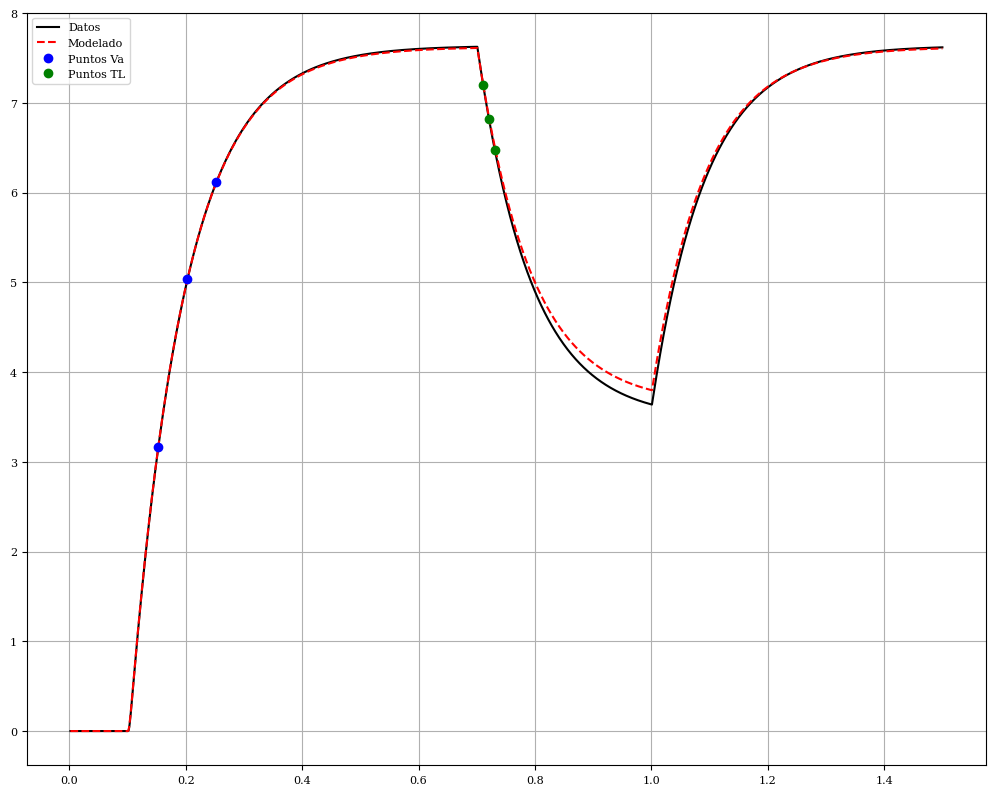

In [ ]:
# ###### Ia_Va= s/(La*(s**2 + Ra*s/La + Ki*Km/(Jm*La)))
# wr_va= Ki/(Jm*La*(s**2 + s*(Bm*La + Jm*Ra)/(Jm*La) + (Bm*Ra + Ki*Km)/(Jm*La)))
sis_wr_va=tf([Ki],Jm*La*np.array([1, (Bm*La + Jm*Ra)/(Jm*La), (Bm*Ra + Ki*Km)/(Jm*La)]))
# 1*tf([.45, 1],
# Ia_Va=Bm*(Jm/Bm*s+1)/(Jm*La)/(s**2+(Bm*La+Jm*Ra)/(Jm*La)*s+(Bm*Ra  + Ki*Km)/(Jm*La))
sis_ia_va=tf(Bm*np.array([Jm/Bm,1])/(Jm*La),np.array([1,(Bm*La+Jm*Ra)/(Jm*La),(Bm*Ra  + Ki*Km)/(Jm*La)]))
# wr_TL=Ra*(La*s/Ra + 1)/(Jm*La*(s**2 + s*(Bm*La + Jm*Ra)/(Jm*La) + (Bm*Ra + Ki*Km)/(Jm*La)))
sis_wr_TL=tf(Ra*np.array([La/Ra, 1]), Jm*La*np.array([1, (Bm*La + Jm*Ra)/(Jm*La), (Bm*Ra + Ki*Km)/(Jm*La)]))
# sys_id_tc=signal.TransferFunction(np.transpose([G_td*1., -zeros_s*G_td]),np.poly(poles_s))
# # df_Motor.columns = ['t', 'wr', 'i_t', 'Vin', 'TL'] #Renombro las columnas
# Sistema de transferencia Va
# [y1, t1_, ent00 ]= lsim(sis_wr_va, U=df_Motor['Vin'], T=t_D,X0=[0,0])
# # Simulación para TL
# [y2, t2_, ent01 ]= lsim(sis_wr_TL, U=TL, T=t_D,X0=[0,0])
t1_, y1 = sim_modelo(sis_wr_va, ue=df_Motor['Vin'],te= df_Motor['t'])
# Simulación para TL
t2_, y2 = sim_modelo(sis_wr_TL, ue=df_Motor['TL'], te=df_Motor['t'])

t3_, y3 = sim_modelo(sis_ia_va, ue=df_Motor['Vin'], te=df_Motor['t'])

# with plt.style.context('science'):
# with plt.style.context('dark_background'):
# plt.rcParams['font.family'] = 'DejaVu Serif'

with plt.style.context('ieee'):
# with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
    plt.rcParams['font.family'] = 'DejaVu Serif'

#   fig, axs = plt.subplots(2,figsize=(10,8), dpi= 100) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
    plt.figure(figsize=(10, 8), dpi= 100)
    # fig, axs = plt.subplots(2,2,figsize=(13,10), dpi= 100) #fig, axs = plt.su
    # Graficar resultados
    # plt.figure()
    plt.plot(t_D, df_Motor['wr'], label='Datos')
    plt.plot(t_D, y1 - y2, 'r', label='Modelado')
    plt.plot([t + ret, t2 + ret, t3 + ret], [y_t, y_t2, y_t3], 'o', label='Puntos Va')
    plt.plot([t_tl + ret_tl, t2_tl + ret_tl, t3_tl + ret_tl], [y_t_tl, y_t2_tl, y_t3_tl], 'o', label='Puntos TL')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def modmotor(t_etapa, xant, accion):
    """
    Simula el modelo de un motor eléctrico para identificación.
    Parámetros:
    - t_etapa: duración de la etapa de simulación (segundos)
    - xant: estado anterior [ia, wr, tita_r]
    - accion: entrada [Va, TL]

    Retorna:
    - X: nuevo estado [ia, wr, tita_r]
    """
# Constantes Iniciales
    # Ra=2.27;La=0.0047;Ki=0.25;Kb=0.25;Bm=0.00131;Jm=0.00233;Km=Kb; Laa=La; J=Jm;B=Bm; %Motor

# Constantes Identificadas
    Ra= 2.2781228953606902 ; Laa= 0.005187184919244553 ; Ki= 0.2618711775870197
    Jm= 0.002848787974411428 ; Bm= 0.0014279727330389095 ; Kb= 0.2499435593696499

    h = 0.0004247701268049  # Paso de integración
    # Variables de estado
    ia, wr, titar = xant
    Va, TL = accion
    # Número de pasos de integración
    pasos = int(t_etapa / h)
    for _ in range(pasos):
        ia_p = -(Ra / Laa) * ia - (Kb / Laa) * wr + (1 / Laa) * Va
        wr_p = (Ki / Jm) * ia - (Bm / Jm) * wr - (1 / Jm) * TL
        ia += ia_p * h
        wr += wr_p * h
        titar += wr * h
    return np.array([ia, wr, titar])

At=df_Motor['t'][10]-df_Motor['t'][9]
X  = np.array([0.0, 0.0, 0.0])  # ia, wr, tita_r
wr_id=np.zeros(len(df_Motor['t']))
ia_id=np.zeros(len(df_Motor['t']))
for ii in range(len(df_Motor['t'])):
    wr_id[ii]=X[1]
    ia_id[ii]=X[0]
    X = modmotor(At, X , np.array([df_Motor['Vin'][ii], df_Motor['TL'][ii]])  )

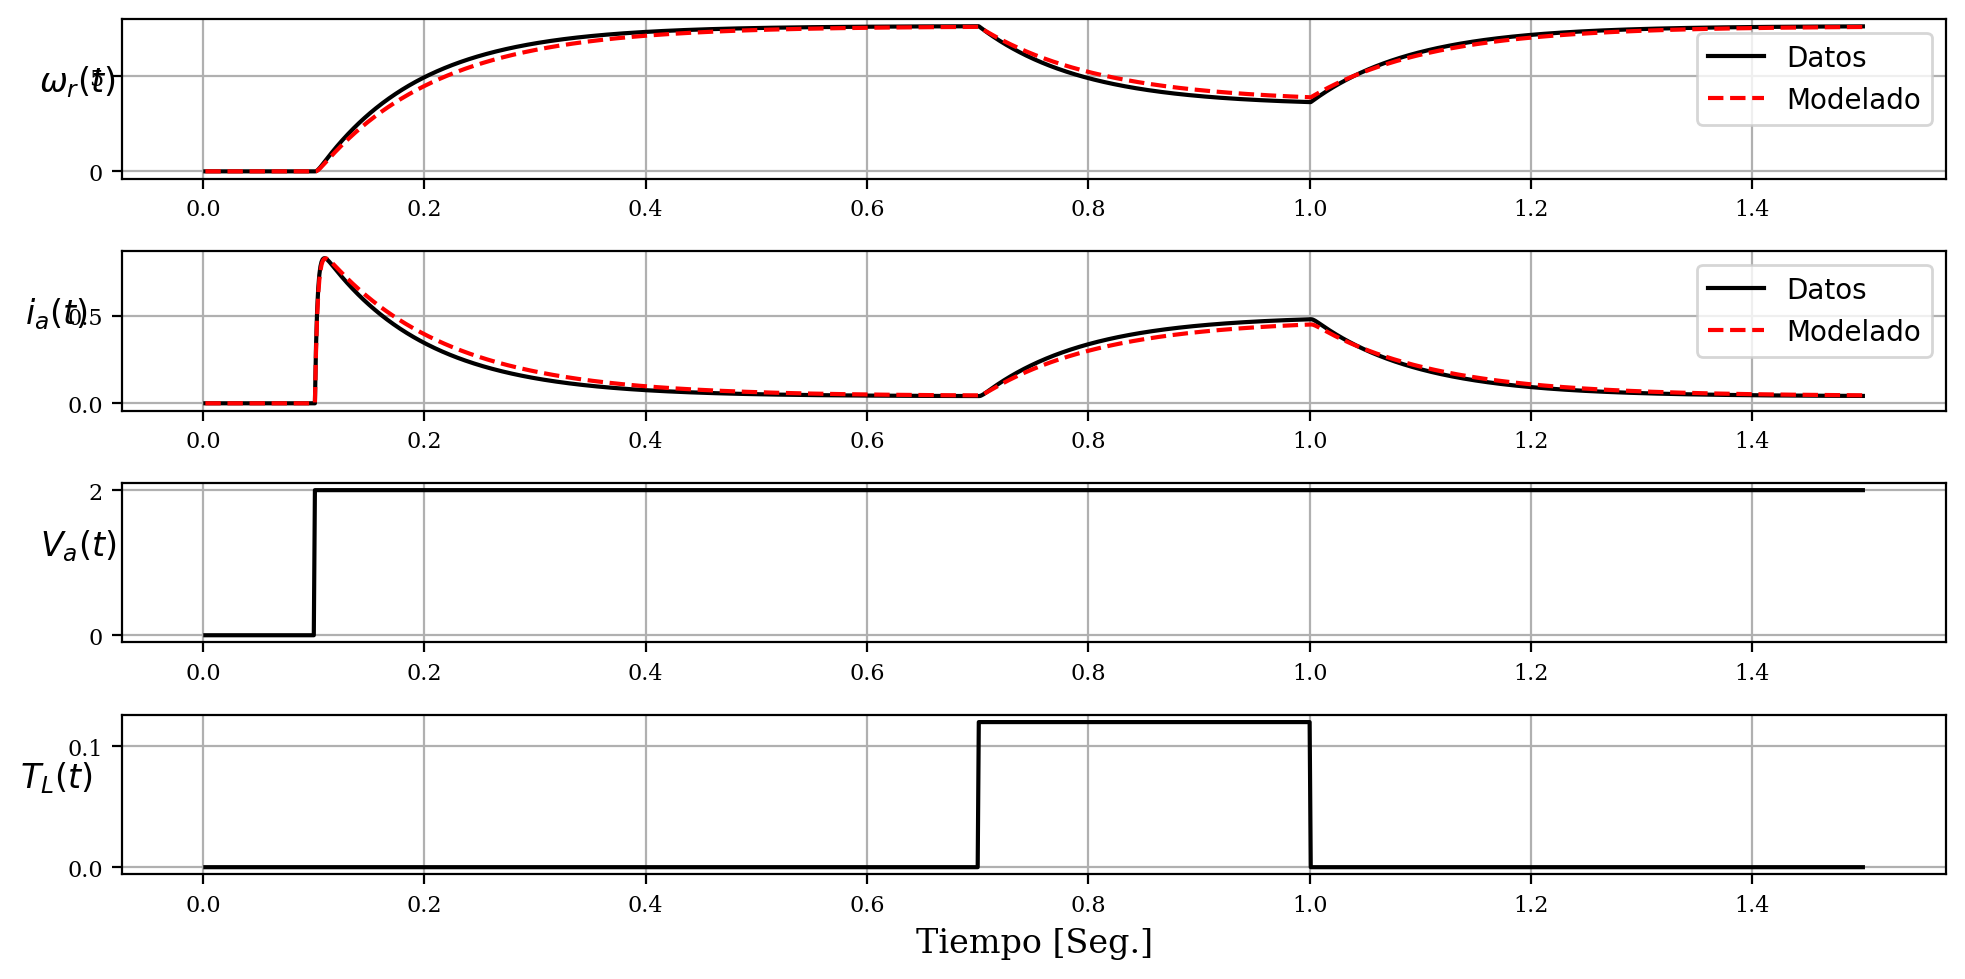

In [ ]:
with plt.style.context('ieee'): #
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig10, ax13 = plt.subplots(4,1,figsize=(10,5), dpi= 200)
ax13[0].plot(df_Motor['t'],df_Motor['wr'], label='Datos')
ax13[0].plot(t1_,wr_id, label='Modelado')
ax13[0].legend()
ax13[0].set_ylabel(r'$\omega_r{(t)}$',rotation=0, fontsize=12)
ax13[0].grid( True )
ax13[1].plot(df_Motor['t'],df_Motor['i_t'], label='Datos')
ax13[1].plot(t3_,ia_id, label='Modelado')
ax13[1].legend()
ax13[1].set_ylabel(r'$i_a{(t)}$',rotation=0, fontsize=12)
ax13[1].grid( True )
ax13[2].plot(df_Motor['t'],df_Motor['Vin'])
ax13[2].set_ylabel(r'$V_a{(t)}$',rotation=0, fontsize=12)
ax13[2].grid( True )
ax13[3].plot(df_Motor['t'],df_Motor['TL'])
ax13[3].set_ylabel(r'$T_L{(t)}$',rotation=0, fontsize=12)
ax13[3].grid( True )
ax13[3].set_xlabel(r'Tiempo [Seg.]',rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# Conclusiones
Se han obtenido los parámetros de un circuito RLC y de un Motor CC.
El error resultante depende de la exactitud y cantidad de datos.

# Cierre


Impresión a un archivo pdf con marcadores en cada título.

In [ ]:
!apt-get upgrade
# !apt-get update #Casi nunca es necesario

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic  --fix-missing #funciona ok

In [ ]:
%%shell
sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!pip install pandoc

In [ ]:
%%shell
sudo apt-get install pandoc

In [ ]:
import pandoc

In [ ]:
import nbconvert # Luego, debe descargarse el nb actual y subirse al entorno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to the directory where your file is
# %cd /content/gdrive/MyDrive/Colab Notebooks
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Verify that now you see your notebooks
!ls

In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/TP_N1_Identificacion_Exacta.ipynb"
### Descargar el html y luego imprimirlo a pdf

In [ ]:
#Da mensajes de WARNING, pero funciona.
%%shell
# pandoc --to pdf --pdf-engine=xelatex  --from ipynb -o 'TP_N1_Identificacion_Exacta.pdf' 'TP_N1_Identificacion_Exacta.ipynb'
pandoc --to pdf --pdf-engine=xelatex  --from html -o '/content/drive/MyDrive/Colab Notebooks/TP_N1_Identificacion_Exacta.pdf' '/content/drive/MyDrive/Colab Notebooks/TP_N1_Identificacion_Exacta.html'